### Report Analysis

In [152]:
import unicodedata
import os
import sys
import re
import numpy as np
import pandas as pd
from pathlib import Path
import nltk
from nltk import word_tokenize 
import shutil
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns
import glob

##### Functions

In [153]:
# custom character alphabet for word
tr = re.compile(r"[abcçdefgğhıijklmnoöprsştuüvyzqxw]+", re.IGNORECASE|re.UNICODE) # Turkish filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789'
en = re.compile(r"[abcdefghıijklmnopqrstxuvwyz]+", re.IGNORECASE|re.UNICODE) # English
nl = re.compile(r"[abcdefghıijklmnopqrstxuvwyzāăēĕīĭōŏūŭ]+", re.IGNORECASE|re.UNICODE) # Dutch (Flemenk)
fr = re.compile(r"[abcçdefghıijklmnopqrstxuvwyzàâæèéêëîïôœùûüÿ]+", re.IGNORECASE|re.UNICODE) # French
de = re.compile(r"[abcdefghıijklmnopqrstxuvwyzäöüß]+", re.IGNORECASE|re.UNICODE) # German
es = re.compile(r"[abcdefghıijklmnopqrstxuvwyzñáéíóú]+", re.IGNORECASE|re.UNICODE) # Spanish (¿¡)
pt = re.compile(r"[abcçdefghıijklmnopqrstxuvwyzàáâãéêíóôõú]+", re.IGNORECASE|re.UNICODE) # Portuguese
it = re.compile(r"[abcdefghıijklmnopqrstxuvwyzàéèìòùî]+", re.IGNORECASE|re.UNICODE) # Italian
ar = re.compile(r"[ٿصؼۤڳڲؿڎػڠجڿ٬ٸؽؒؓطۄڀۂؘؔتٚڛےٝڜؖڦ٫ډ۰زۇٖۀ،لۓعٮێڔ۶ؚۧۜڤۏإٞٷؗۖ؈ژۣؕؑٴأۻڸۺگاڴڹۯ؉ْڌ؍ي؟ـٟړۅؐڶُىڽېًۢؠضۚڄٛڏٱۦ٩س٦ڼڂٔۘ٠ښٌٍ۬ٳ۾ٲږذۋٵٜ٘ڞڅںٗهڣۿپڒۥۗڋیؙم؞ثۨٹڵڪظٶۭ١ڭەڨحٕ؎ٺڷٰ۪۫ڻڥۛڑڟټآڡغګ؊ّٯڧڮ؏ۮ؋ؤ٪ؾڗۼق۟دکوِڰڐۃ۽ہفرڇچڝ۴بۈٽڕۡھةٓڃئ؛ڬٙڙڢڱۊَۆۉځ۠ۍۑۙڊنءڈٻشڍ؇۵كخ\ا]+", re.IGNORECASE|re.UNICODE) # Arabic

In [154]:
def convert_one_character_letter(text):
    '''This function converts two byte occupy of letter to one byte unicode character without any visual change \n
    like as Turkish character ç,ş,ö,ğ. \n
    convert_one_character_letter(text): text is any string word or sentence.
    '''
    new_text = unicodedata.normalize('NFC', f"{text}")
    return new_text

In [155]:
def clean_text(text, custom_alp=tr): # for only string in specific language
    '''This function extract custom_alp character from string \n
    clean_text(text, custom_alp): text is any string word or sentence and custom_alp is specific alphabet.
    '''
    #text_clean = re.findall(custom_alp, text)
    text_result_list = []
    text_list = re.findall(r'\S+', text)
    for text_var in text_list:
        text_clean = re.findall(custom_alp, str(text_var))
        text_result_var = "".join(text_clean)
        text_result_list.append(text_result_var)
    text_result = " ".join(text_result_list)
    return text_result

In [156]:
def lower_func(text):
    '''This function convert string character to lowercase. \n
    lower_func(text=str): text is any string word or sentence
    '''
    string_lower = str.lower(text)
    return string_lower

In [157]:
def character_clean_lower_text(text, custom_alp=tr): # for only string in specific language
    '''This function converts two byte occupy of letter to one byte unicode character without any visual change \n
    like as Turkish character ç,ş,ö,ğ. And also extract custom_alp character from string and convert to lowercase. \n
    character_clean_lower_text(text, custom_alp): text is any string word or sentence and custom_alp is specific alphabet.  
    '''
    new_text = unicodedata.normalize('NFC', f"{text}")
    text_result_list = []
    text_list = re.findall(r'\S+', new_text)  # like as word tokenize
    for text_var in text_list:
        text_clean = re.findall(custom_alp, str(text_var))
        text_result_var = "".join(text_clean)
        text_result_list.append(text_result_var)
    text_join = " ".join(text_result_list)
    text_result = str.lower(text_join)
    return text_result

In [158]:
def whitespace_del(text):
    '''This function provides removing left right white space.\n
    whitespace_del(text): text is a string value as word or sentence.
    '''
    text = text.strip()  # rstrip lstrip
    return text

#### Tips

##### Analysis

In [159]:
# df['Quality'] = df[['total_bill','tip']].apply(lambda df : quality(df['total_bill'], df['tip']),axis=1)
# df['Quality'] = np.vectorize(quality)(df['total_bill'],df['tip'])  # much faster

In [160]:
# df.info(), df,describe(), df.columns, df.index, df.shape, df.shape[0], df.set_index("Payment ID")

# df['tip_percentage'] = 100 * df['tip'] / df['total_bill']

# df['price_per_person'] = np.round(df['total_bill']/df['size'],2)

# df.drop('tip_percentage',axis=1)

In [161]:
# Merging

# help(pd.merge)

# pd.merge(registrations,logins,how='inner',on='name')

# pd.merge(left=registrations, right=logins,how='right',on='name')

# registrations.columns = ["reg_name","reg_id"]

# pd.merge(registrations,logins,how='inner',left_on="reg_name", right_on="name")

In [162]:
# Conditional Filter

# df[(df['total_bill']>30) & (df['sex'] == 'Male')]  # and

# df[(df['total_bill']>30) | (df['sex'] == 'Male')]  # or

# options = ['Sat','Sun']
# df[df['day'].isin(options)]

In [163]:
# Groupby

# df.groupby('model_year').describe()

# df[df['cylinders'].isin([6,8])].groupby(['model_year', 'cylinders']).mean()

# df.sort_index(level='model_year',ascending=False)

# df.agg(['std','mean']), df.agg(['std','mean'])['mpg'], df.agg({'mpg':['max','mean'],'weight':['mean','std']})

In [164]:
# File

# df = pd.read_excel("my_excel_file.xlsx", sheet_name="First_Sheet")

# df.to_excel('example.xlsx', sheet_name="First_Sheet", index=False)

In [165]:
# Missing

# df[df['pre_movie_score'].isnull()], df[df['pre_movie_score'].notnull()], df[(df['pre_movie_score'].isnull()) & (df['first_name'].notnull())]

# df.dropna(subset=['last_name']), df.dropna(axis=0)

# df['pre_movie_score'] = df['pre_movie_score'].fillna(0), df['pre_movie_score'].fillna(df['pre_movie_score'].mean())

In [166]:
# Statistic Sorting

# df['total_bill'].idxmax() # Row location, df['total_bill'].idxmin() # Row location, df.iloc[df['total_bill'].idxmax]

# df.corr(), df['sex'].value_counts(), df['sex'].replace('Female','F'), df['sex'].replace(['Female','Male'],['F','M'])

# mymap = {'Female':'F','Male':'M'}
# df['sex'].map(mymap)

# df.duplicated(), df['total_bill'].between(10,20,inclusive=True), df[df['total_bill'].between(10,20,inclusive=True)]

# sales["DATE"].dt.year, sales["DATE"].dt.month

##### Visualization

In [167]:
# plt.plot(x,z)
# plt.xlabel('X Axis')
# plt.ylabel("Y Axis")
# plt.xlim(0,6)
# plt.ylim(0,15)
# plt.title("String Title")
# help(plt.savefig)

In [168]:
# labels = ['UK', 'USA', 'GER', 'JAP', 'FRA']
# men_means = [40, 35, 45, 53, 28]
# fig, ax = plt.subplots(figsize=(8,5))
# ax.bar(labels,men_means, label="Men", width=0.4)
# ax.set_ylabel('Ages')
# ax.set_title("Ages means by Gender")
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend();

In [169]:
# labels = ['UK', 'USA', 'GER', 'JAP', 'FRA']
# men_means = [40, 35, 45, 53, 28]
# women_means = [35, 32, 48, 48, 31]
# fig, ax = plt.subplots(figsize=(8,5))
# x = np.arange(len(labels))
# width = 0.4
# ax.bar(x - width/2,men_means, width, label="Men")
# ax.bar(x + width/2,women_means, width, label="Women")
# ax.set_ylabel('Ages')
# ax.set_title("Ages means by Gender")
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend();

In [170]:
# fig = plt.figure()
# # Large Axes
# axes1 = fig.add_axes([0,0,1,1])
# axes1.plot(a,b)
# # Small Axes
# axes2 = fig.add_axes([0.2,0.2,0.5,0.5])
# axes2.plot(x,y)
# plt.show()

In [171]:
# fig = plt.figure()
# # Large Axes
# axes1 = fig.add_axes([0,0,1,1])
# axes1.plot(a,b)
# axes1.set_xlim(0,8)
# axes1.set_ylim(0,8000)
# axes1.set_xlabel('A')
# axes1.set_ylabel('B')
# axes2.set_title('Nonlinear')
# # Small Axes
# axes2 = fig.add_axes([0.2,0.2,0.5,0.5])
# axes2.plot(x,y)
# axes2.set_xlim(0,8)
# axes2.set_ylim(0,15)
# axes2.set_xlabel('A')
# axes2.set_ylabel('B')
# axes2.set_title('Linear')
# plt.show()

In [172]:
# fig = plt.figure()
# # Large Axes
# axes1 = fig.add_axes([0,0,1,1])
# axes1.plot(a,b)
# axes1.set_xlim(0,10)
# axes1.set_ylim(0,8000)
# axes1.set_xlabel('A')
# axes1.set_ylabel('B')
# axes2.set_title('Nonlinear')
# # Small Axes
# axes2 = fig.add_axes([0.5,0.5,0.4,0.5])
# axes2.plot(x,y)
# axes2.set_xlim(0,8)
# axes2.set_ylim(0,15)
# axes2.set_xlabel('A')
# axes2.set_ylabel('B')
# axes2.set_title('Linear')
# plt.show()

In [173]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.plot(x,x,label='X vs X')
# ax.plot(x,x**2,label="X vs X^2")
# ax.legend(loc=0)

In [174]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.plot(x,x,label='X vs X')
# ax.plot(x,x**2,label="X vs X^2")
# ax.legend(loc=(1.1,0.5))

In [175]:
# fig, axes = plt.subplots(nrows=2,ncols=2)
# axes[0][0].plot(x,y)
# axes[0][1].plot(x,y)
# axes[1][0].plot(x,y)
# axes[1][1].plot(a,b)
# fig.subplots_adjust()  # fig.subplots_adjust(wspace=0.9, hspace=1), plt.tight_layout()

In [176]:
# fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(6,10),dpi=200)
# axes[0][0].plot(x,y)
# axes[0][0].set_xlabel("X_LABEL 1,0")
# axes[0][1].plot(x,y)
# axes[0][1].set_xlim(2,6)
# axes[1][0].plot(x,y)
# axes[1][0].set_ylabel("Y_LABEL 1,0")
# axes[1][1].plot(a,b)
# axes[1][1].set_title('TITLE')
# fig.suptitle("Figure Level",fontsize=16)
# plt.tight_layout()
# fig.set_figwidth(10)
# fig.savefig('new_subplots.png',bbox_inches='tight')

In [177]:
# plt.figure(figsize=(10,6),dpi=200)
# sns.countplot(data=df, x="level of education", hue="division");

In [178]:
# plt.figure(figsize=(10,6),dpi=200)
# sns.barplot(data=df, x="level of education",y="salary",estimator=np.mean,ci="sd",hue="division")
# plt.legend(bbox_to_anchor=(1.05,1));

In [179]:
# plt.figure(figsize=(15,7))
# sns.barplot(x="day",y="tip",data=tips,estimator=np.mean,ci="sd",hue="smoker")
# plt.legend(bbox_to_anchor=(1.08,0.2));

In [180]:
# ax=pr.groupby("Geographic Area").poverty_rate.mean().plot.bar(rot=45,figsize=(15,8))
# ax.set_ylabel("Poverty Rate")
# ax.set_xlabel("States")
# ax.set_title("Poverty Rate Given States")
# ax.legend();

In [181]:
# fig, ax = plt.subplots(figsize=(15,7))
# sns.barplot(x="name_or_surname_most_frequency", y="frequency", data=df)
# ax.set_ylabel("Poverty Rate")
# ax.set_xlabel("States")
# ax.set_title("Poverty Rate Given States")
# ax.set_xticks(x)
# ax.set_xticklabels(labels, rotation=45)
# 
# for p in ax.patches:
#     ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

In [182]:
# labels = labels
# sizes = sizes
# explode = (0, 0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
# 
# fig1, ax1 = plt.subplots(figsize=(10,10))
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=False, startangle=0);

##### Test

In [183]:
text = "&AhmEy  okula39 +takıl"

In [184]:
clean_text(text, custom_alp=tr)

'AhmEy okula takıl'

In [185]:
character_clean_lower_text(text, custom_alp=tr)

'ahmey okula takıl'

#### Dogan Bazaar

In [186]:
df_year = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\DoganBazaar\report-year-2024-07-04.csv")
df_year

,Tarih,Satılan ürün sayısı,Sipariş sayısı,Ortalama net satış tutarı,Kupon tutarı,Gönderim tutarı,Brüt satış miktarı,Net satış tutarı,İade tutarı
0,2024-1,346,148,235875.85,1453.70,1637.62,164003.19,162365.57,153.29
1,2024-2,631,201,0.00,2806.89,4579.18,190030.34,185451.16,1459.97
2,2024-3,870,336,0.00,5709.85,6398.98,344925.22,338526.24,1854.97
3,2024-4,639,344,0.00,2845.30,7348.98,338393.30,331494.26,18576.53
4,2024-5,843,446,0.00,2131.64,10297.64,345020.54,334722.90,3668.35
5,2024-6,1089,225,0.00,845.50,4648.89,295007.06,290393.16,1254.96
6,2024-7,24,7,235875.85,0.00,49.99,8227.63,8177.64,4500.00


In [187]:
df_year["Satılan ürün sayısı"].sum()

4442

In [188]:
df_year["Sipariş sayısı"].sum()

1707

In [189]:
df_year.columns = [x.lower() for x in df_year.columns]
df_year

,tarih,satılan ürün sayısı,sipariş sayısı,ortalama net satış tutarı,kupon tutarı,gönderim tutarı,brüt satış miktarı,net satış tutarı,i̇ade tutarı
0,2024-1,346,148,235875.85,1453.70,1637.62,164003.19,162365.57,153.29
1,2024-2,631,201,0.00,2806.89,4579.18,190030.34,185451.16,1459.97
2,2024-3,870,336,0.00,5709.85,6398.98,344925.22,338526.24,1854.97
3,2024-4,639,344,0.00,2845.30,7348.98,338393.30,331494.26,18576.53
4,2024-5,843,446,0.00,2131.64,10297.64,345020.54,334722.90,3668.35
5,2024-6,1089,225,0.00,845.50,4648.89,295007.06,290393.16,1254.96
6,2024-7,24,7,235875.85,0.00,49.99,8227.63,8177.64,4500.00


In [190]:
df_year["sipariş ortalama ürün miktarı"] = df_year["satılan ürün sayısı"]/df_year["sipariş sayısı"]
df_year

,tarih,satılan ürün sayısı,sipariş sayısı,ortalama net satış tutarı,kupon tutarı,gönderim tutarı,brüt satış miktarı,net satış tutarı,i̇ade tutarı,sipariş ortalama ürün miktarı
0,2024-1,346,148,235875.85,1453.70,1637.62,164003.19,162365.57,153.29,2.337838
1,2024-2,631,201,0.00,2806.89,4579.18,190030.34,185451.16,1459.97,3.139303
2,2024-3,870,336,0.00,5709.85,6398.98,344925.22,338526.24,1854.97,2.589286
3,2024-4,639,344,0.00,2845.30,7348.98,338393.30,331494.26,18576.53,1.857558
4,2024-5,843,446,0.00,2131.64,10297.64,345020.54,334722.90,3668.35,1.890135
5,2024-6,1089,225,0.00,845.50,4648.89,295007.06,290393.16,1254.96,4.840000
6,2024-7,24,7,235875.85,0.00,49.99,8227.63,8177.64,4500.00,3.428571


In [191]:
year_net_sales = df_year["net satış tutarı"].sum()
year_net_sales

1651130.9299999997

In [192]:
year_retun = df_year["i̇ade tutarı"].sum()
year_retun

31468.069999999996

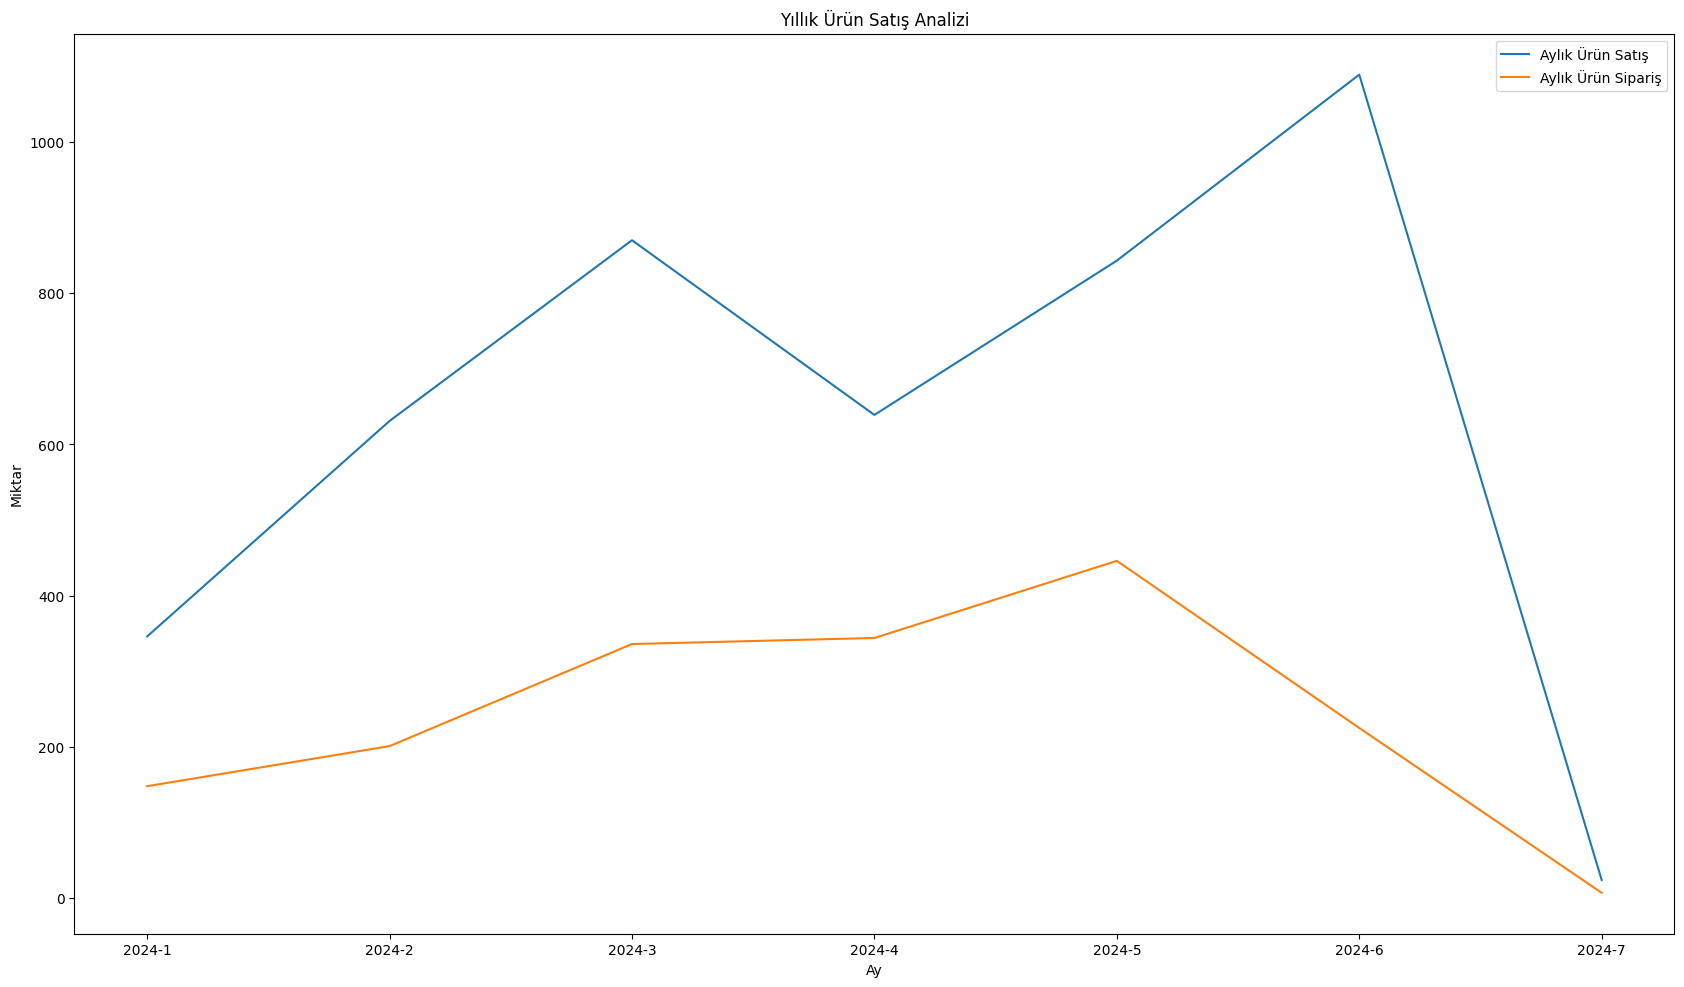

In [193]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.plot(df_year["tarih"],df_year["satılan ürün sayısı"],label='Aylık Ürün Satış')
ax.plot(df_year["tarih"],df_year["sipariş sayısı"],label="Aylık Ürün Sipariş")
ax.set_title("Yıllık Ürün Satış Analizi")
ax.set_ylabel("Miktar")
ax.set_xlabel("Ay")
ax.legend(loc=0)

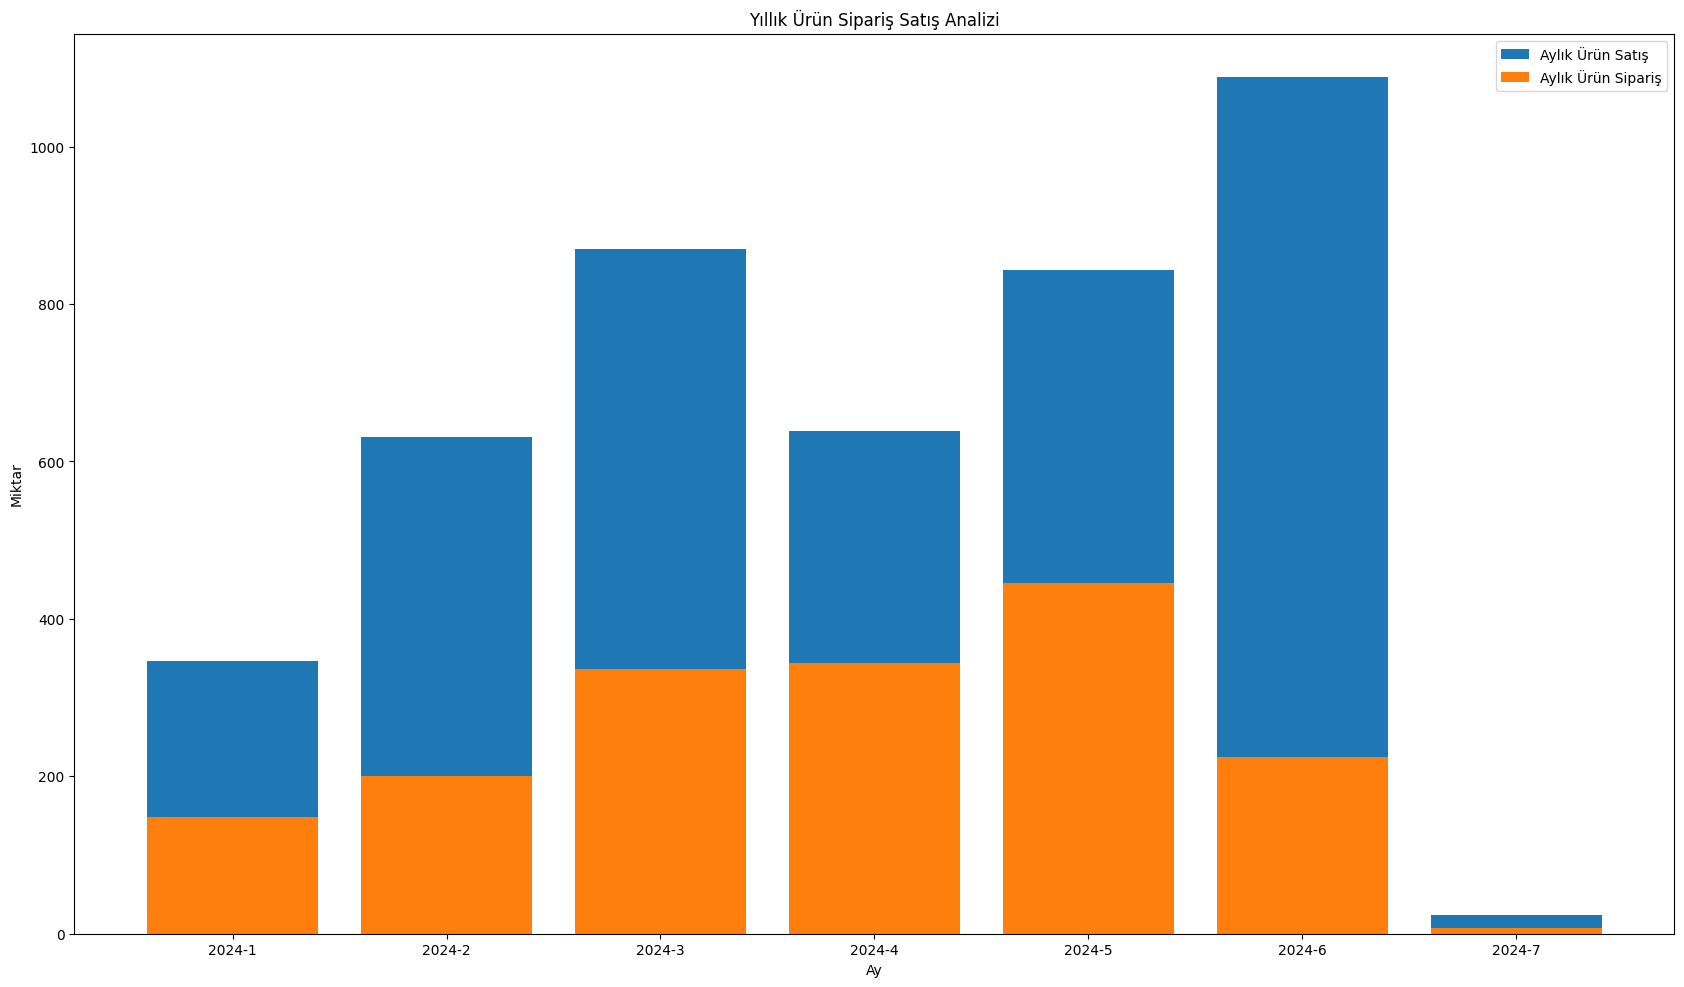

In [194]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.bar(df_year["tarih"],df_year["satılan ürün sayısı"],label='Aylık Ürün Satış')
ax.bar(df_year["tarih"],df_year["sipariş sayısı"],label="Aylık Ürün Sipariş")
ax.set_title("Yıllık Ürün Sipariş Satış Analizi")
ax.set_ylabel("Miktar")
ax.set_xlabel("Ay")
ax.legend(loc=0)

In [ ]:
dfm = df_year.melt('tarih', var_name='cols', value_name='vals')

C:\Users\user\AppData\Local\Temp\ipykernel_6876\4186864628.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(0,0.1));


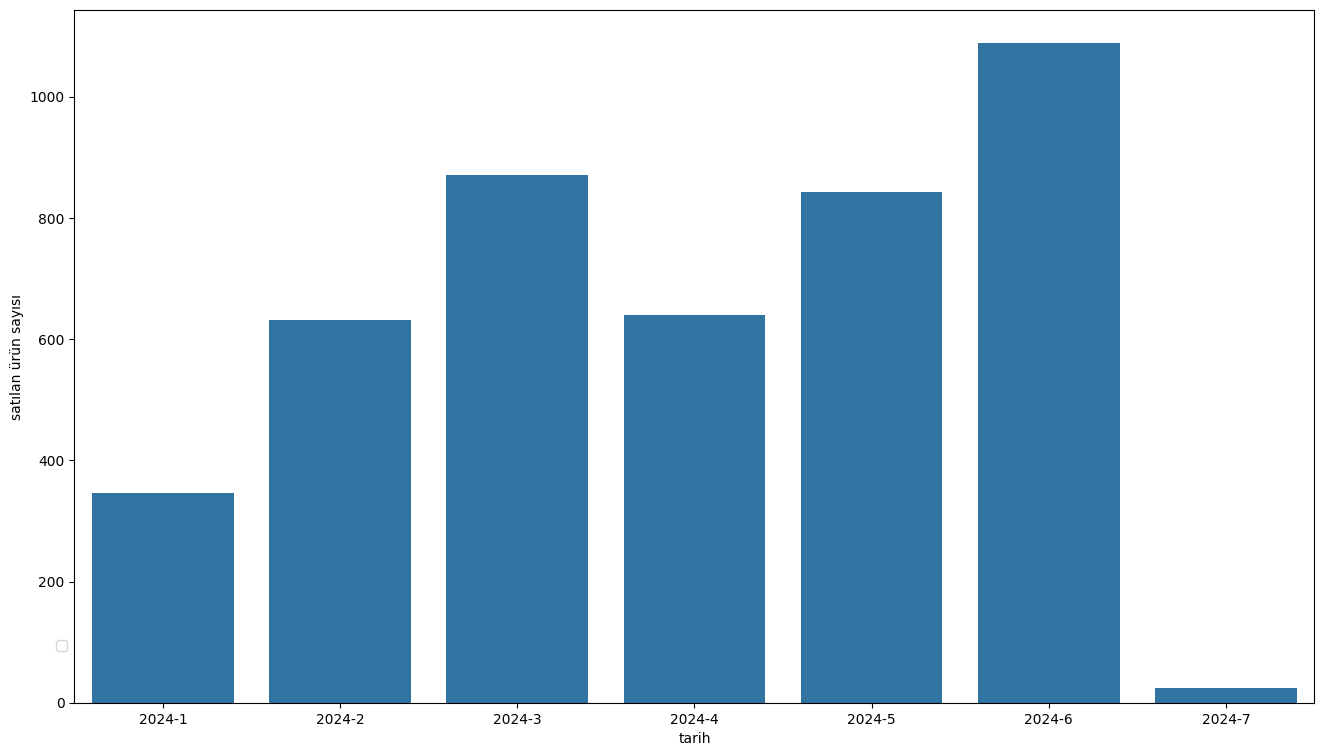

In [208]:
plt.figure(figsize=(16,9),dpi=100)
sns.barplot(data=df_year, x="tarih",y="satılan ürün sayısı")
plt.legend(bbox_to_anchor=(0,0.1));

In [214]:
list(df_year["tarih"])

['2024-1', '2024-2', '2024-3', '2024-4', '2024-5', '2024-6', '2024-7']

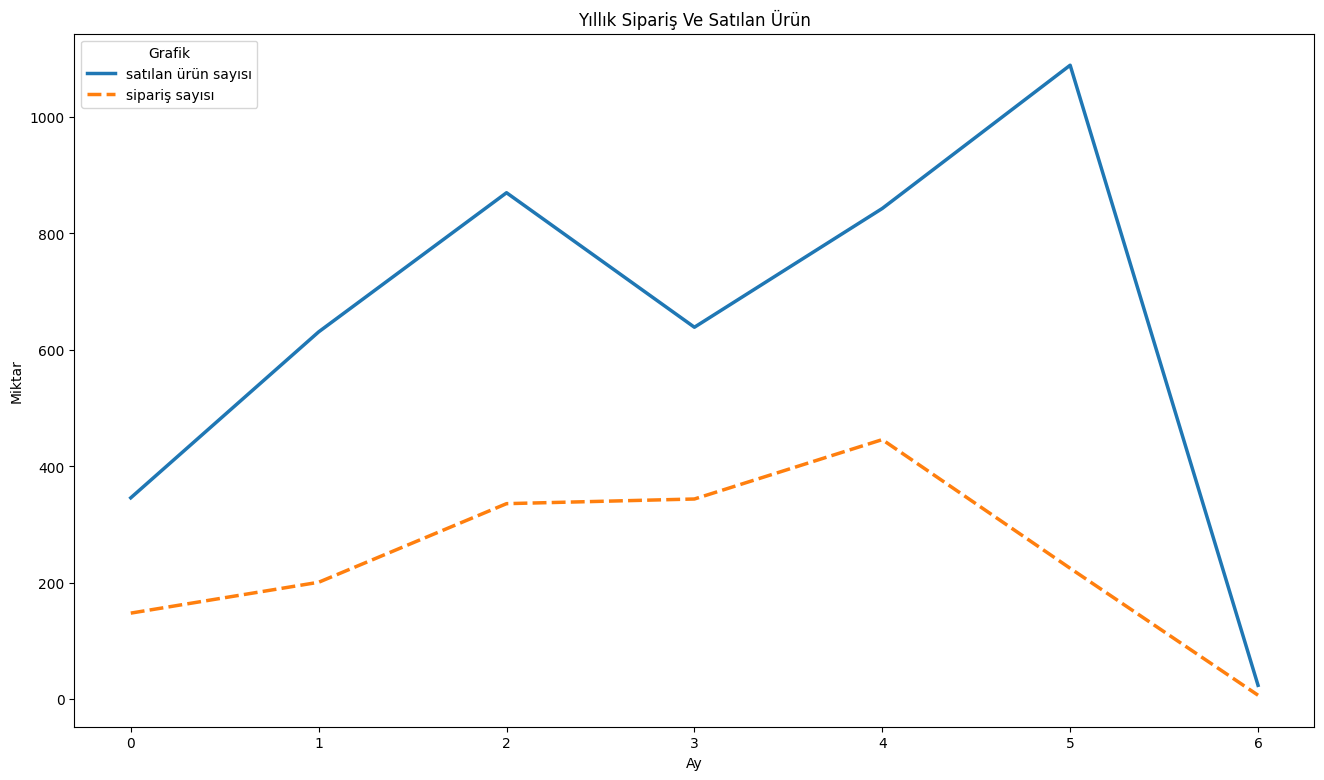

In [227]:
fig, ax = plt.subplots(figsize=(16,9),dpi=100)
sns.lineplot(df_year[["tarih","satılan ürün sayısı","sipariş sayısı"]], linewidth=2.5, palette="tab10")
plt.ylabel('Miktar')
plt.xlabel('Ay')
plt.title('Yıllık Sipariş Ve Satılan Ürün')
plt.legend(title='Grafik', loc='upper left');

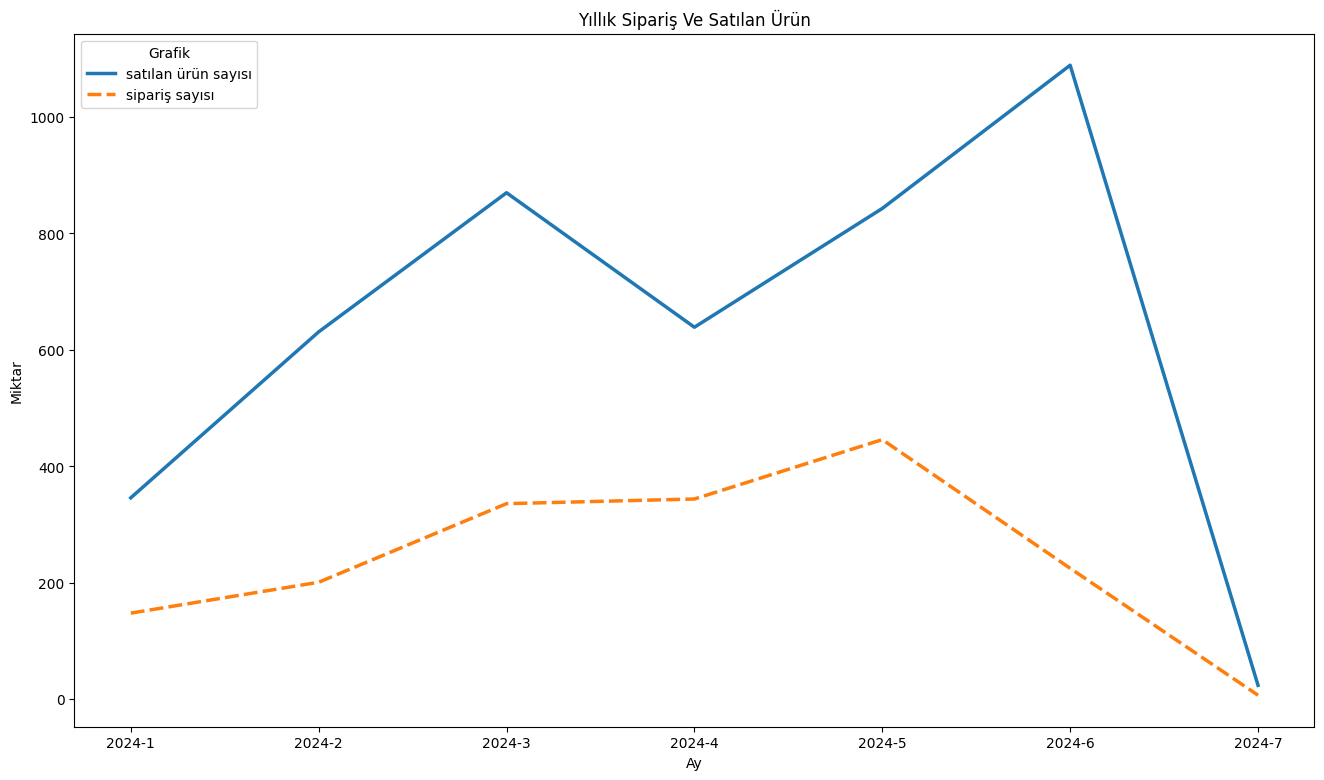

In [225]:
fig, ax = plt.subplots(figsize=(16,9),dpi=100)
sns.lineplot(df_year[["tarih","satılan ürün sayısı","sipariş sayısı"]], linewidth=2.5, palette="tab10")
plt.ylabel('Miktar')
plt.xlabel('Ay')

# giving xticks value manually
xlabel_value = list(df_year["tarih"])
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(xlabel_value)

plt.title('Yıllık Sipariş Ve Satılan Ürün')
plt.legend(title='Grafik', loc='upper left');

<Axes: xlabel='tarih'>

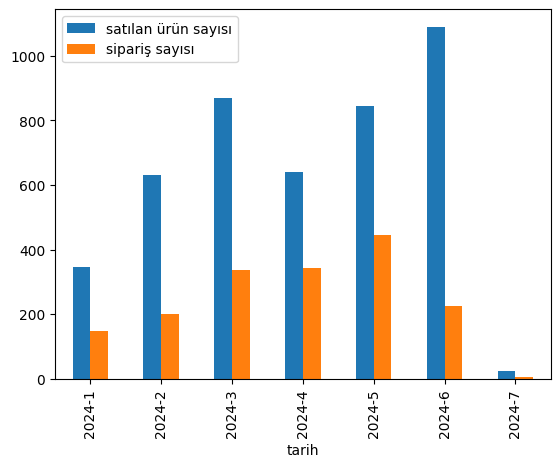

In [195]:
df_year.plot(x="tarih", y=["satılan ürün sayısı", "sipariş sayısı"], kind="bar")

In [196]:
df_year.columns

Index(['tarih', 'satılan ürün sayısı', 'sipariş sayısı',
       'ortalama net satış tutarı', 'kupon tutarı', 'gönderim tutarı',
       'brüt satış miktarı', 'net satış tutarı', 'i̇ade tutarı',
       'sipariş ortalama ürün miktarı'],
      dtype='object')

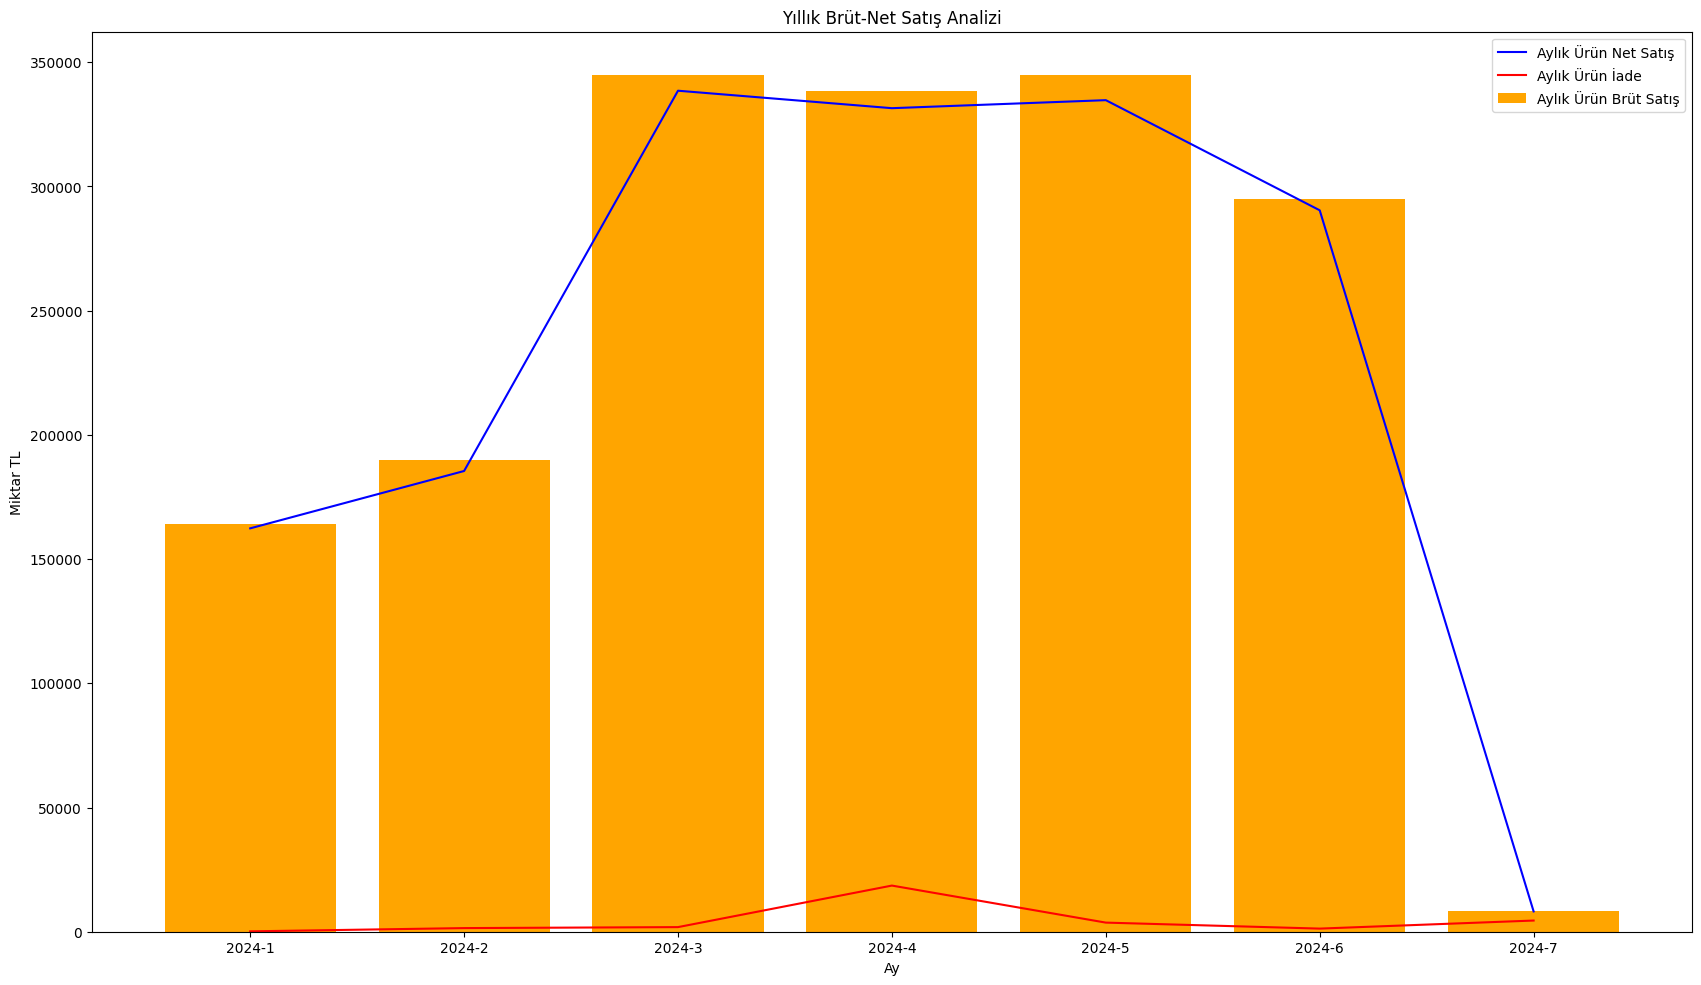

In [228]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.bar(df_year["tarih"],df_year["brüt satış miktarı"],label='Aylık Ürün Brüt Satış', color="orange")
ax.plot(df_year["tarih"],df_year["net satış tutarı"],label='Aylık Ürün Net Satış', color="blue")
ax.plot(df_year["tarih"],df_year["i̇ade tutarı"],label='Aylık Ürün İade', color="red")
ax.set_title("Yıllık Brüt-Net Satış Analizi")
ax.set_ylabel("Miktar TL")
ax.set_xlabel("Ay")
ax.legend(loc=0);

In [229]:
df_year.columns

Index(['tarih', 'satılan ürün sayısı', 'sipariş sayısı',
       'ortalama net satış tutarı', 'kupon tutarı', 'gönderim tutarı',
       'brüt satış miktarı', 'net satış tutarı', 'i̇ade tutarı',
       'sipariş ortalama ürün miktarı'],
      dtype='object')

In [230]:
df_year_prod_num = df_year[["satılan ürün sayısı","sipariş sayısı"]]
df_year_prod_num

,satılan ürün sayısı,sipariş sayısı
0,346,148
1,631,201
2,870,336
3,639,344
4,843,446
5,1089,225
6,24,7


In [250]:

# col1_var = list(df_year_prod_num.columns)
# col2_var = [df_year_prod_num["satılan ürün sayısı"].sum(),df_year_prod_num["sipariş sayısı"].sum()]
# df_year_prod_num_sum = pd.DataFrame({"Name":col1_var, "Toplam":col2_var})
df_year_prod_num_sum = pd.DataFrame({"Name":df_year_prod_num.columns, "Toplam":[df_year_prod_num["satılan ürün sayısı"].sum(),df_year_prod_num["sipariş sayısı"].sum()]})
df_year_prod_num_sum

,Name,Toplam
0,satılan ürün sayısı,4442
1,sipariş sayısı,1707


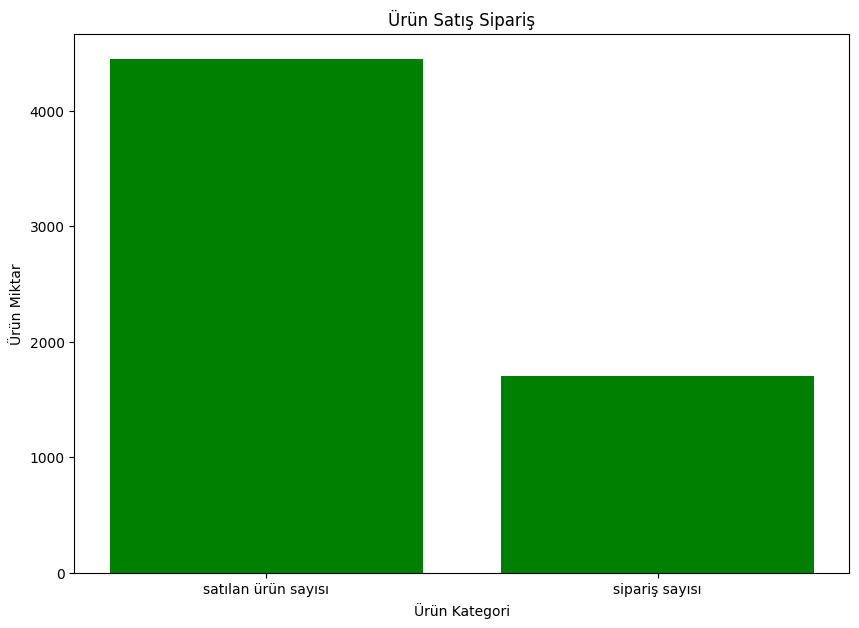

In [260]:
plt.figure(figsize=(10,7))
plt.bar(x=df_year_prod_num_sum["Name"], height=df_year_prod_num_sum["Toplam"], color="green")
plt.xlabel("Ürün Kategori")
plt.ylabel("Ürün Miktar")
plt.title("Ürün Satış Sipariş");

In [81]:
df_month = pd.read_csv(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\DoganBazaar\report-last_month-2024-07-04.csv")
df_month

,Tarih,Satılan ürün sayısı,Sipariş sayısı,Ortalama net satış tutarı,Kupon tutarı,Gönderim tutarı,Brüt satış miktarı,Net satış tutarı,İade tutarı
0,2024-6-1,38,20,9679.77,606.0,414.89,14641.24,14226.35,0.00
1,2024-6-2,25,17,0.00,0.0,609.86,7499.67,6889.81,0.00
2,2024-6-3,81,25,0.00,239.5,564.86,134594.08,134029.22,0.00
3,2024-6-4,28,19,0.00,0.0,529.87,13822.69,13292.82,0.00
4,2024-6-5,32,18,0.00,0.0,279.92,9008.57,8728.65,0.00
5,2024-6-6,18,10,0.00,0.0,69.98,6319.84,6249.86,0.00
6,2024-6-7,41,12,0.00,0.0,139.96,16283.43,16143.47,0.00
7,2024-6-8,17,10,0.00,0.0,34.99,8928.89,8893.90,0.00
8,2024-6-9,52,17,0.00,0.0,139.96,13040.59,12900.63,0.00
9,2024-6-10,144,13,0.00,0.0,169.96,13667.77,13497.81,0.00


In [82]:
df_month.columns = [x.lower() for x in df_month.columns]

C:\Users\user\AppData\Local\Temp\ipykernel_6876\2904709874.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(df_month["tarih"]), rotation=45)


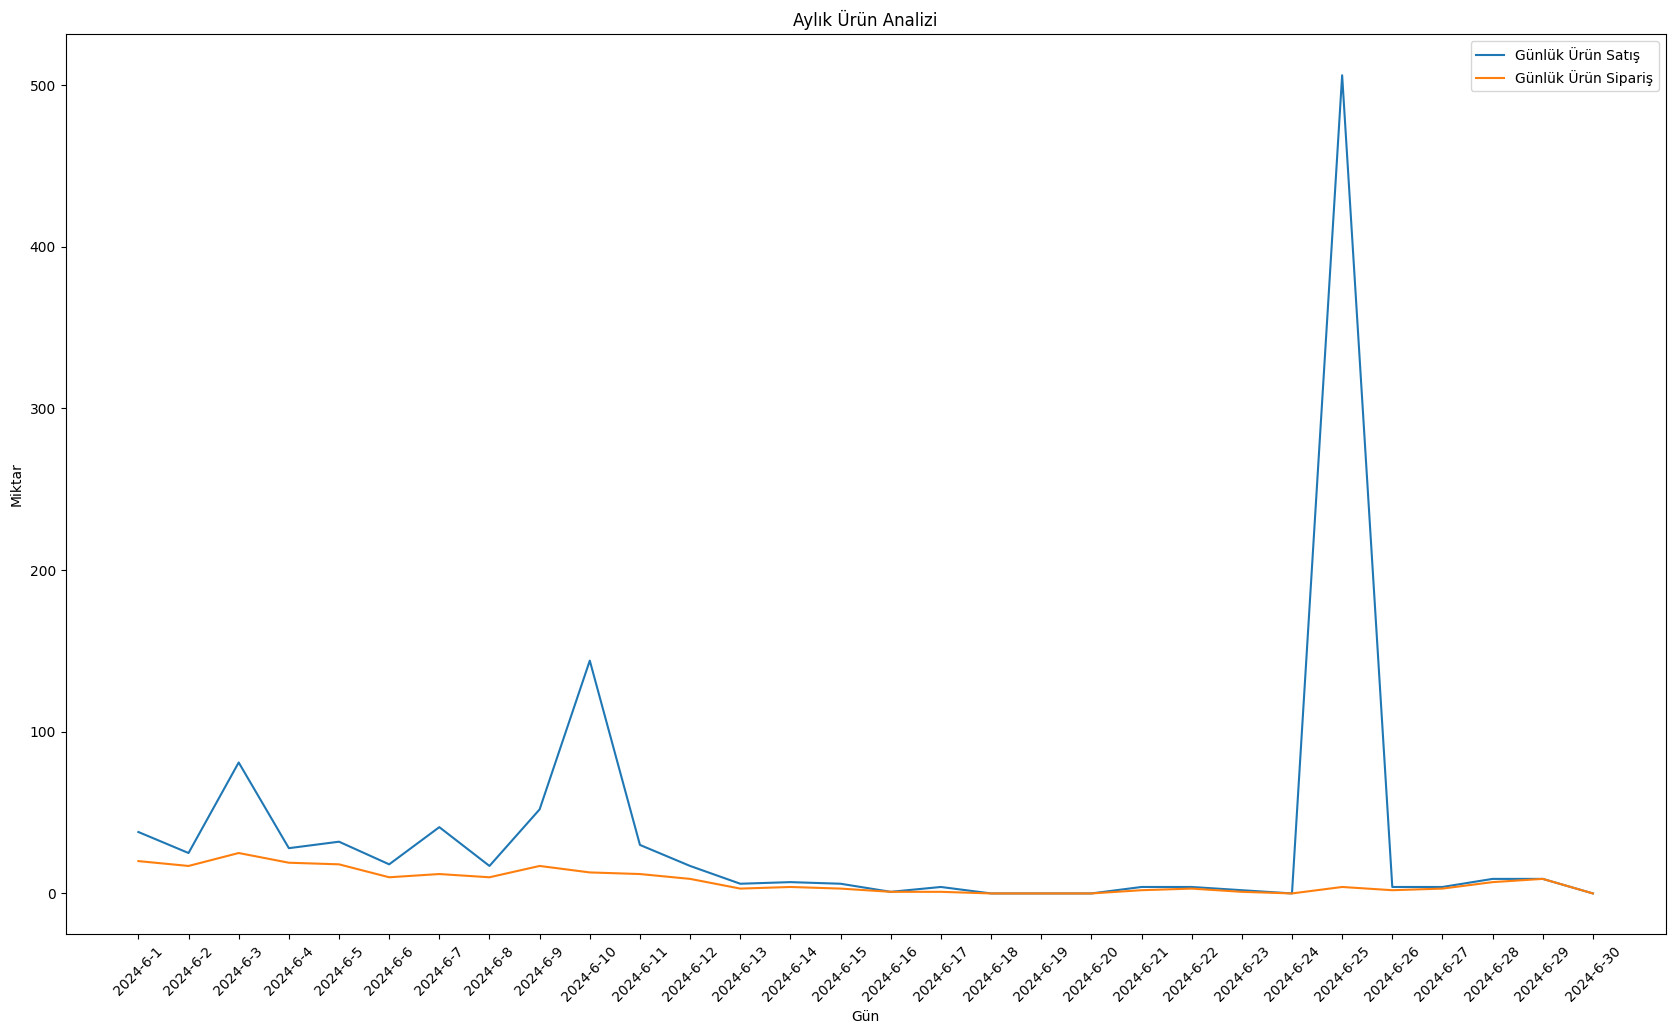

In [83]:
fig = plt.figure(figsize=(16,9), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.plot(df_month["tarih"],df_month["satılan ürün sayısı"],label='Günlük Ürün Satış')
ax.plot(df_month["tarih"],df_month["sipariş sayısı"],label="Günlük Ürün Sipariş")
ax.set_title("Aylık Ürün Analizi")
ax.set_ylabel("Miktar")
ax.set_xlabel("Gün")
ax.set_xticklabels(list(df_month["tarih"]), rotation=45)
ax.legend(loc=0);

#### Trendyol

##### Category

In [84]:
df_category_seller_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Kategori\seller-356254-kategori-bazlı-satış-raporu-2024.07.02-13.55.55.xlsx")
df_category_seller_year

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Kategori,Brüt Satış Adedi,İptal Adedi,İptal Oranı,İade Adedi,İade Oranı,Net Satış Adedi,Brüt Ciro,Net Ciro,Toplam Komisyon Tutarı,Ortalama Komisyon Tutarı,Ortalama Komisyon Oranı,Ortalama Satış Fiyatı
0,Kedi ve Köpek Mama Su Kabı,17609,601,3.41,749,4.25,16259,3428004,3117615,535474.92,32.93,17.18,191.75
1,Türk Kahvesi Makinesi,5262,269,5.11,700,13.30,4293,3315973,2699888,140009.85,32.61,5.19,628.90
2,Tost Makinesi,5608,221,3.94,449,8.01,4938,2763155,2415761,222969.58,45.15,9.23,489.22
3,Evcilik ve Mutfak Setleri,923,38,4.12,20,2.17,865,1951493,1822228,253964.23,293.60,13.94,2106.62
4,Çay Makinesi,3820,161,4.21,231,6.05,3428,1770599,1590258,135304.83,39.47,8.51,463.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Glutensiz Ürün,1,0,0.00,0,0.00,1,53,53,8.08,8.08,15.25,53.00
232,Kuru Kayısı,1,0,0.00,0,0.00,1,50,50,7.63,7.63,15.26,50.00
233,El Rondosu,1,1,100.00,0,0.00,0,355,0,0.00,0.00,0.00,0.00
234,Cüzdan,2,2,100.00,0,0.00,0,898,0,0.00,0.00,0.00,0.00


In [85]:
# df_category_seller_year.isnull()

In [86]:
df_category_seller_year.columns = [x.lower() for x in df_category_seller_year.columns]
df_category_seller_year

,kategori,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,i̇ade adedi,i̇ade oranı,net satış adedi,brüt ciro,net ciro,toplam komisyon tutarı,ortalama komisyon tutarı,ortalama komisyon oranı,ortalama satış fiyatı
0,Kedi ve Köpek Mama Su Kabı,17609,601,3.41,749,4.25,16259,3428004,3117615,535474.92,32.93,17.18,191.75
1,Türk Kahvesi Makinesi,5262,269,5.11,700,13.30,4293,3315973,2699888,140009.85,32.61,5.19,628.90
2,Tost Makinesi,5608,221,3.94,449,8.01,4938,2763155,2415761,222969.58,45.15,9.23,489.22
3,Evcilik ve Mutfak Setleri,923,38,4.12,20,2.17,865,1951493,1822228,253964.23,293.60,13.94,2106.62
4,Çay Makinesi,3820,161,4.21,231,6.05,3428,1770599,1590258,135304.83,39.47,8.51,463.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Glutensiz Ürün,1,0,0.00,0,0.00,1,53,53,8.08,8.08,15.25,53.00
232,Kuru Kayısı,1,0,0.00,0,0.00,1,50,50,7.63,7.63,15.26,50.00
233,El Rondosu,1,1,100.00,0,0.00,0,355,0,0.00,0.00,0.00,0.00
234,Cüzdan,2,2,100.00,0,0.00,0,898,0,0.00,0.00,0.00,0.00


In [87]:
df_category_seller_year = df_category_seller_year.dropna()

In [88]:
object_columns = df_category_seller_year.select_dtypes(include='object')
object_columns

,kategori
0,Kedi ve Köpek Mama Su Kabı
1,Türk Kahvesi Makinesi
2,Tost Makinesi
3,Evcilik ve Mutfak Setleri
4,Çay Makinesi
...,...
231,Glutensiz Ürün
232,Kuru Kayısı
233,El Rondosu
234,Cüzdan


In [89]:
df_category_seller_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_category_seller_year

,kategori,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,i̇ade adedi,i̇ade oranı,net satış adedi,brüt ciro,net ciro,toplam komisyon tutarı,ortalama komisyon tutarı,ortalama komisyon oranı,ortalama satış fiyatı
0,kedi ve köpek mama su kabı,17609,601,3.41,749,4.25,16259,3428004,3117615,535474.92,32.93,17.18,191.75
1,türk kahvesi makinesi,5262,269,5.11,700,13.30,4293,3315973,2699888,140009.85,32.61,5.19,628.90
2,tost makinesi,5608,221,3.94,449,8.01,4938,2763155,2415761,222969.58,45.15,9.23,489.22
3,evcilik ve mutfak setleri,923,38,4.12,20,2.17,865,1951493,1822228,253964.23,293.60,13.94,2106.62
4,çay makinesi,3820,161,4.21,231,6.05,3428,1770599,1590258,135304.83,39.47,8.51,463.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,glutensiz ürün,1,0,0.00,0,0.00,1,53,53,8.08,8.08,15.25,53.00
232,kuru kayısı,1,0,0.00,0,0.00,1,50,50,7.63,7.63,15.26,50.00
233,el rondosu,1,1,100.00,0,0.00,0,355,0,0.00,0.00,0.00,0.00
234,cüzdan,2,2,100.00,0,0.00,0,898,0,0.00,0.00,0.00,0.00


In [90]:
df_category_seller_year.kategori.nunique()

236

In [91]:
df_category_cancel_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Kategori\seller-356254-kategori-bazlı-iptal-raporu-2024.07.02-13.56.27.xlsx")
df_category_cancel_year

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Kategori,Brüt Ciro,Tahmini Satış Kaybı,Brüt Satış Adedi,İptal Adedi,İptal Oranı,Müşterinin İptal Ettiği,Trendyol'un İptal Ettiği,Benim İptal Ettiğim
0,Kedi ve Köpek Mama Su Kabı,3428004,120544.48,17609,601,3.41,595,6,0
1,Türk Kahvesi Makinesi,3315973,167241.49,5262,269,5.11,239,30,0
2,Tesbih,72923,4077.05,3163,237,7.49,81,156,0
3,Tost Makinesi,2763155,107729.63,5608,221,3.94,191,29,1
4,Kamp Masası,847424,29818.52,5328,186,3.49,182,1,3
...,...,...,...,...,...,...,...,...,...
140,Kedi ve Köpek Taşıma Çantası,5028,462.00,7,1,14.29,1,0,0
141,Köpek Aksesuarı,1707,240.56,12,1,8.33,1,0,0
142,Servis Seti,2326,220.00,9,1,11.11,1,0,0
143,Uyarı ve Yönlendirme Levhaları,1703,109.99,13,1,7.69,1,0,0


In [92]:
# df_category_cancel_year.isnull()

In [93]:
df_category_cancel_year.columns = [x.lower() for x in df_category_cancel_year.columns]
df_category_cancel_year

,kategori,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,müşterinin i̇ptal ettiği,trendyol'un i̇ptal ettiği,benim i̇ptal ettiğim
0,Kedi ve Köpek Mama Su Kabı,3428004,120544.48,17609,601,3.41,595,6,0
1,Türk Kahvesi Makinesi,3315973,167241.49,5262,269,5.11,239,30,0
2,Tesbih,72923,4077.05,3163,237,7.49,81,156,0
3,Tost Makinesi,2763155,107729.63,5608,221,3.94,191,29,1
4,Kamp Masası,847424,29818.52,5328,186,3.49,182,1,3
...,...,...,...,...,...,...,...,...,...
140,Kedi ve Köpek Taşıma Çantası,5028,462.00,7,1,14.29,1,0,0
141,Köpek Aksesuarı,1707,240.56,12,1,8.33,1,0,0
142,Servis Seti,2326,220.00,9,1,11.11,1,0,0
143,Uyarı ve Yönlendirme Levhaları,1703,109.99,13,1,7.69,1,0,0


In [94]:
df_category_cancel_year = df_category_cancel_year.dropna()

In [95]:
object_columns = df_category_cancel_year.select_dtypes(include='object')
object_columns

,kategori
0,Kedi ve Köpek Mama Su Kabı
1,Türk Kahvesi Makinesi
2,Tesbih
3,Tost Makinesi
4,Kamp Masası
...,...
140,Kedi ve Köpek Taşıma Çantası
141,Köpek Aksesuarı
142,Servis Seti
143,Uyarı ve Yönlendirme Levhaları


In [96]:
df_category_cancel_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_category_cancel_year

,kategori,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,müşterinin i̇ptal ettiği,trendyol'un i̇ptal ettiği,benim i̇ptal ettiğim
0,kedi ve köpek mama su kabı,3428004,120544.48,17609,601,3.41,595,6,0
1,türk kahvesi makinesi,3315973,167241.49,5262,269,5.11,239,30,0
2,tesbih,72923,4077.05,3163,237,7.49,81,156,0
3,tost makinesi,2763155,107729.63,5608,221,3.94,191,29,1
4,kamp masası,847424,29818.52,5328,186,3.49,182,1,3
...,...,...,...,...,...,...,...,...,...
140,kedi ve köpek taşıma çantası,5028,462.00,7,1,14.29,1,0,0
141,köpek aksesuarı,1707,240.56,12,1,8.33,1,0,0
142,servis seti,2326,220.00,9,1,11.11,1,0,0
143,uyarı ve yönlendirme levhaları,1703,109.99,13,1,7.69,1,0,0


In [97]:
df_category_return_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Kategori\seller-356254-kategori-bazlı-iade-raporu-2024.07.02-13.57.15.xlsx")
df_category_return_year

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Kategori,Brüt Ciro,Tahmini Satış Kaybı,Brüt Satış Adedi,İade Adedi,İade Oranı,Modelini Beğenmedim,Kusurlu Ürün Gönderildi,Yanlış Ürün Gönderildi,Vazgeçtim,Diğer,Bedeni/Ebatı Küçük Geldi,Bedeni/Ebatı Büyük Geldi,Ürün ile Görsel & İçerik Bilgisi Uyuşmuyor,Yanlış Sipariş Verdim,Kalitesini Beğenmedim,Teslim Edilemeyen Gönderi
0,Kedi ve Köpek Mama Su Kabı,3428004,169344.30,17609,749,4.25,0,273,30,42,255,68,10,0,26,0,45
1,Türk Kahvesi Makinesi,3315973,438093.19,5262,700,13.30,0,352,7,44,242,9,3,0,20,0,23
2,Tost Makinesi,2763155,234427.64,5608,449,8.01,0,188,6,35,152,15,18,0,10,0,25
3,Saklama Kabı,1564090,150548.96,3665,327,8.92,0,152,8,25,87,20,18,0,6,0,11
4,Çay Makinesi,1770599,102652.53,3820,231,6.05,0,105,8,14,78,1,7,0,7,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Kedi Tasması,4753,150.00,32,1,3.13,0,0,0,0,1,0,0,0,0,0,0
128,Kişisel Blender,18515,313.27,49,1,2.04,0,1,0,0,0,0,0,0,0,0,0
129,Meyve Kurusu,10665,296.99,120,1,0.83,0,1,0,0,0,0,0,0,0,0,0
130,Eğitici Oyuncaklar,12719,190.00,99,1,1.01,0,0,0,0,1,0,0,0,0,0,0


In [98]:
# df_category_return_year.isnull()

In [99]:
df_category_return_year.columns = [x.lower() for x in df_category_return_year.columns]
df_category_return_year

,kategori,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ade adedi,i̇ade oranı,modelini beğenmedim,kusurlu ürün gönderildi,yanlış ürün gönderildi,vazgeçtim,diğer,bedeni/ebatı küçük geldi,bedeni/ebatı büyük geldi,ürün ile görsel & i̇çerik bilgisi uyuşmuyor,yanlış sipariş verdim,kalitesini beğenmedim,teslim edilemeyen gönderi
0,Kedi ve Köpek Mama Su Kabı,3428004,169344.30,17609,749,4.25,0,273,30,42,255,68,10,0,26,0,45
1,Türk Kahvesi Makinesi,3315973,438093.19,5262,700,13.30,0,352,7,44,242,9,3,0,20,0,23
2,Tost Makinesi,2763155,234427.64,5608,449,8.01,0,188,6,35,152,15,18,0,10,0,25
3,Saklama Kabı,1564090,150548.96,3665,327,8.92,0,152,8,25,87,20,18,0,6,0,11
4,Çay Makinesi,1770599,102652.53,3820,231,6.05,0,105,8,14,78,1,7,0,7,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Kedi Tasması,4753,150.00,32,1,3.13,0,0,0,0,1,0,0,0,0,0,0
128,Kişisel Blender,18515,313.27,49,1,2.04,0,1,0,0,0,0,0,0,0,0,0
129,Meyve Kurusu,10665,296.99,120,1,0.83,0,1,0,0,0,0,0,0,0,0,0
130,Eğitici Oyuncaklar,12719,190.00,99,1,1.01,0,0,0,0,1,0,0,0,0,0,0


In [100]:
df_category_return_year = df_category_return_year.dropna()

In [101]:
object_columns = df_category_return_year.select_dtypes(include='object')
object_columns

,kategori
0,Kedi ve Köpek Mama Su Kabı
1,Türk Kahvesi Makinesi
2,Tost Makinesi
3,Saklama Kabı
4,Çay Makinesi
...,...
127,Kedi Tasması
128,Kişisel Blender
129,Meyve Kurusu
130,Eğitici Oyuncaklar


In [102]:
df_category_return_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_category_return_year

,kategori,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ade adedi,i̇ade oranı,modelini beğenmedim,kusurlu ürün gönderildi,yanlış ürün gönderildi,vazgeçtim,diğer,bedeni/ebatı küçük geldi,bedeni/ebatı büyük geldi,ürün ile görsel & i̇çerik bilgisi uyuşmuyor,yanlış sipariş verdim,kalitesini beğenmedim,teslim edilemeyen gönderi
0,kedi ve köpek mama su kabı,3428004,169344.30,17609,749,4.25,0,273,30,42,255,68,10,0,26,0,45
1,türk kahvesi makinesi,3315973,438093.19,5262,700,13.30,0,352,7,44,242,9,3,0,20,0,23
2,tost makinesi,2763155,234427.64,5608,449,8.01,0,188,6,35,152,15,18,0,10,0,25
3,saklama kabı,1564090,150548.96,3665,327,8.92,0,152,8,25,87,20,18,0,6,0,11
4,çay makinesi,1770599,102652.53,3820,231,6.05,0,105,8,14,78,1,7,0,7,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,kedi tasması,4753,150.00,32,1,3.13,0,0,0,0,1,0,0,0,0,0,0
128,kişisel blender,18515,313.27,49,1,2.04,0,1,0,0,0,0,0,0,0,0,0
129,meyve kurusu,10665,296.99,120,1,0.83,0,1,0,0,0,0,0,0,0,0,0
130,eğitici oyuncaklar,12719,190.00,99,1,1.01,0,0,0,0,1,0,0,0,0,0,0


##### Brand

In [103]:
df_brand_seller_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Marka\seller-356254-marka-bazlı-satış-raporu-2024.07.02-13.51.48.xlsx")
df_brand_seller_year

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Marka,Brüt Satış Adedi,İptal Adedi,İptal Oranı,İade Adedi,İade Oranı,Net Satış Adedi,Brüt Ciro,Net Ciro,Toplam Komisyon Tutarı,Ortalama Komisyon Tutarı,Ortalama Komisyon Oranı,Ortalama Satış Fiyatı
0,AWOX,18645,809,4.34,1599,8.58,16237,9805904,8408753,626299.51,38.57,7.45,517.88
1,Pikas,16180,605,3.74,791,4.89,14784,4447299,4020481,475088.45,32.14,11.82,271.95
2,GOBYPET,21069,730,3.46,844,4.01,19495,3868777,3526024,612212.78,31.40,17.36,180.87
3,ALAS,13295,408,3.07,309,2.32,12578,3207276,2998047,522929.25,41.57,17.44,238.36
4,ROZİTOYS,1201,45,3.75,40,3.33,1116,2353709,2182688,303815.89,272.24,13.92,1955.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,ALAMODE,2,1,50.00,0,0.00,1,148,74,12.04,12.04,16.27,74.00
100,NATUREVA,2,1,50.00,0,0.00,1,130,60,9.76,9.76,16.27,60.00
101,enc home,1,1,100.00,0,0.00,0,420,0,0.00,0.00,0.00,0.00
102,GUARD,2,2,100.00,0,0.00,0,898,0,0.00,0.00,0.00,0.00


In [104]:
# df_brand_seller_year.isnull()

In [105]:
df_brand_seller_year.columns = [x.lower() for x in df_brand_seller_year.columns]
df_brand_seller_year

,marka,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,i̇ade adedi,i̇ade oranı,net satış adedi,brüt ciro,net ciro,toplam komisyon tutarı,ortalama komisyon tutarı,ortalama komisyon oranı,ortalama satış fiyatı
0,AWOX,18645,809,4.34,1599,8.58,16237,9805904,8408753,626299.51,38.57,7.45,517.88
1,Pikas,16180,605,3.74,791,4.89,14784,4447299,4020481,475088.45,32.14,11.82,271.95
2,GOBYPET,21069,730,3.46,844,4.01,19495,3868777,3526024,612212.78,31.40,17.36,180.87
3,ALAS,13295,408,3.07,309,2.32,12578,3207276,2998047,522929.25,41.57,17.44,238.36
4,ROZİTOYS,1201,45,3.75,40,3.33,1116,2353709,2182688,303815.89,272.24,13.92,1955.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,ALAMODE,2,1,50.00,0,0.00,1,148,74,12.04,12.04,16.27,74.00
100,NATUREVA,2,1,50.00,0,0.00,1,130,60,9.76,9.76,16.27,60.00
101,enc home,1,1,100.00,0,0.00,0,420,0,0.00,0.00,0.00,0.00
102,GUARD,2,2,100.00,0,0.00,0,898,0,0.00,0.00,0.00,0.00


In [106]:
df_brand_seller_year = df_brand_seller_year.dropna()

In [107]:
object_columns = df_brand_seller_year.select_dtypes(include='object')
object_columns

,marka
0,AWOX
1,Pikas
2,GOBYPET
3,ALAS
4,ROZİTOYS
...,...
99,ALAMODE
100,NATUREVA
101,enc home
102,GUARD


In [108]:
df_brand_seller_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_brand_seller_year

,marka,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,i̇ade adedi,i̇ade oranı,net satış adedi,brüt ciro,net ciro,toplam komisyon tutarı,ortalama komisyon tutarı,ortalama komisyon oranı,ortalama satış fiyatı
0,awox,18645,809,4.34,1599,8.58,16237,9805904,8408753,626299.51,38.57,7.45,517.88
1,pikas,16180,605,3.74,791,4.89,14784,4447299,4020481,475088.45,32.14,11.82,271.95
2,gobypet,21069,730,3.46,844,4.01,19495,3868777,3526024,612212.78,31.40,17.36,180.87
3,alas,13295,408,3.07,309,2.32,12578,3207276,2998047,522929.25,41.57,17.44,238.36
4,rozi̇toys,1201,45,3.75,40,3.33,1116,2353709,2182688,303815.89,272.24,13.92,1955.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,alamode,2,1,50.00,0,0.00,1,148,74,12.04,12.04,16.27,74.00
100,natureva,2,1,50.00,0,0.00,1,130,60,9.76,9.76,16.27,60.00
101,enc home,1,1,100.00,0,0.00,0,420,0,0.00,0.00,0.00,0.00
102,guard,2,2,100.00,0,0.00,0,898,0,0.00,0.00,0.00,0.00


In [109]:
df_brand_cancel_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Marka\seller-356254-marka-bazlı-iptal-raporu-2024.07.02-13.53.15.xlsx")
df_brand_cancel_year

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Marka,Brüt Ciro,Tahmini Satış Kaybı,Brüt Satış Adedi,İptal Adedi,İptal Oranı,Müşterinin İptal Ettiği,Trendyol'un İptal Ettiği,Benim İptal Ettiğim
0,AWOX,9805904,454598.44,18645,809,4.34,709,97,3
1,GOBYPET,3868777,140464.26,21069,730,3.46,721,7,2
2,Pikas,4447299,163598.08,16180,605,3.74,528,43,34
3,ALAS,3207276,110623.32,13295,408,3.07,403,5,0
4,HAYATINIZI KOLAYLAŞTIRIN,45103,3467.07,3055,234,7.66,78,156,0
...,...,...,...,...,...,...,...,...,...
63,Furkan,26040,1240.00,21,1,4.76,1,0,0
64,by styles,5661,629.00,9,1,11.11,1,0,0
65,Penguen,4440,450.00,10,1,10.00,1,0,0
66,Goldrumman,3943,141.47,25,1,4.00,1,0,0


In [110]:
# df_brand_cancel_year.isnull()

In [111]:
df_brand_cancel_year.columns = [x.lower() for x in df_brand_cancel_year.columns]
df_brand_cancel_year

,marka,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,müşterinin i̇ptal ettiği,trendyol'un i̇ptal ettiği,benim i̇ptal ettiğim
0,AWOX,9805904,454598.44,18645,809,4.34,709,97,3
1,GOBYPET,3868777,140464.26,21069,730,3.46,721,7,2
2,Pikas,4447299,163598.08,16180,605,3.74,528,43,34
3,ALAS,3207276,110623.32,13295,408,3.07,403,5,0
4,HAYATINIZI KOLAYLAŞTIRIN,45103,3467.07,3055,234,7.66,78,156,0
...,...,...,...,...,...,...,...,...,...
63,Furkan,26040,1240.00,21,1,4.76,1,0,0
64,by styles,5661,629.00,9,1,11.11,1,0,0
65,Penguen,4440,450.00,10,1,10.00,1,0,0
66,Goldrumman,3943,141.47,25,1,4.00,1,0,0


In [112]:
df_brand_cancel_year = df_brand_cancel_year.dropna()

In [113]:
object_columns = df_brand_cancel_year.select_dtypes(include='object')
object_columns

,marka
0,AWOX
1,GOBYPET
2,Pikas
3,ALAS
4,HAYATINIZI KOLAYLAŞTIRIN
...,...
63,Furkan
64,by styles
65,Penguen
66,Goldrumman


In [114]:
df_brand_cancel_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_brand_cancel_year

,marka,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ptal adedi,i̇ptal oranı,müşterinin i̇ptal ettiği,trendyol'un i̇ptal ettiği,benim i̇ptal ettiğim
0,awox,9805904,454598.44,18645,809,4.34,709,97,3
1,gobypet,3868777,140464.26,21069,730,3.46,721,7,2
2,pikas,4447299,163598.08,16180,605,3.74,528,43,34
3,alas,3207276,110623.32,13295,408,3.07,403,5,0
4,hayatinizi kolaylaştirin,45103,3467.07,3055,234,7.66,78,156,0
...,...,...,...,...,...,...,...,...,...
63,furkan,26040,1240.00,21,1,4.76,1,0,0
64,by styles,5661,629.00,9,1,11.11,1,0,0
65,penguen,4440,450.00,10,1,10.00,1,0,0
66,goldrumman,3943,141.47,25,1,4.00,1,0,0


In [115]:
df_brand_return_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Marka\seller-356254-marka-bazlı-iade-raporu-2024.07.02-13.53.46.xlsx")
df_brand_return_year

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Marka,Brüt Ciro,Tahmini Satış Kaybı,Brüt Satış Adedi,İade Adedi,İade Oranı,Modelini Beğenmedim,Kusurlu Ürün Gönderildi,Yanlış Ürün Gönderildi,Vazgeçtim,Diğer,Bedeni/Ebatı Küçük Geldi,Bedeni/Ebatı Büyük Geldi,Ürün ile Görsel & İçerik Bilgisi Uyuşmuyor,Yanlış Sipariş Verdim,Kalitesini Beğenmedim,Teslim Edilemeyen Gönderi
0,AWOX,9805904,908987.02,18645,1599,8.58,0,743,23,116,546,26,31,0,46,0,68
1,GOBYPET,3868777,179318.45,21069,844,4.01,0,263,39,46,309,80,16,0,31,0,60
2,Pikas,4447299,249710.28,16180,791,4.89,0,212,32,58,335,41,35,0,19,0,59
3,ALAS,3207276,79187.40,13295,309,2.32,0,11,22,31,102,69,40,0,14,0,20
4,ALİTECH,934685,70428.61,2078,159,7.65,0,70,0,8,55,15,2,0,3,0,6
5,BrillaHome,608010,69244.01,1818,157,8.64,0,6,15,9,59,48,10,0,5,0,5
6,Furkan Toys,1343621,66088.00,1648,79,4.79,0,14,7,7,28,5,5,0,4,0,9
7,Intex,504320,38016.76,872,63,7.22,0,7,3,8,17,6,14,0,4,0,4
8,Cappadocia Pottery,178568,12412.02,790,55,6.96,0,30,0,2,7,13,1,0,0,0,2
9,proclis,210513,4751.23,2370,51,2.15,0,4,6,1,29,5,0,0,2,0,4


In [116]:
# df_brand_return_year.isnull()

In [117]:
df_brand_return_year.columns = [x.lower() for x in df_brand_return_year.columns]
df_brand_return_year

,marka,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ade adedi,i̇ade oranı,modelini beğenmedim,kusurlu ürün gönderildi,yanlış ürün gönderildi,vazgeçtim,diğer,bedeni/ebatı küçük geldi,bedeni/ebatı büyük geldi,ürün ile görsel & i̇çerik bilgisi uyuşmuyor,yanlış sipariş verdim,kalitesini beğenmedim,teslim edilemeyen gönderi
0,AWOX,9805904,908987.02,18645,1599,8.58,0,743,23,116,546,26,31,0,46,0,68
1,GOBYPET,3868777,179318.45,21069,844,4.01,0,263,39,46,309,80,16,0,31,0,60
2,Pikas,4447299,249710.28,16180,791,4.89,0,212,32,58,335,41,35,0,19,0,59
3,ALAS,3207276,79187.40,13295,309,2.32,0,11,22,31,102,69,40,0,14,0,20
4,ALİTECH,934685,70428.61,2078,159,7.65,0,70,0,8,55,15,2,0,3,0,6
5,BrillaHome,608010,69244.01,1818,157,8.64,0,6,15,9,59,48,10,0,5,0,5
6,Furkan Toys,1343621,66088.00,1648,79,4.79,0,14,7,7,28,5,5,0,4,0,9
7,Intex,504320,38016.76,872,63,7.22,0,7,3,8,17,6,14,0,4,0,4
8,Cappadocia Pottery,178568,12412.02,790,55,6.96,0,30,0,2,7,13,1,0,0,0,2
9,proclis,210513,4751.23,2370,51,2.15,0,4,6,1,29,5,0,0,2,0,4


In [118]:
df_brand_return_year = df_brand_return_year.dropna()

In [119]:
object_columns = df_brand_return_year.select_dtypes(include='object')
object_columns

,marka
0,AWOX
1,GOBYPET
2,Pikas
3,ALAS
4,ALİTECH
5,BrillaHome
6,Furkan Toys
7,Intex
8,Cappadocia Pottery
9,proclis


In [120]:
df_brand_return_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_brand_return_year

,marka,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ade adedi,i̇ade oranı,modelini beğenmedim,kusurlu ürün gönderildi,yanlış ürün gönderildi,vazgeçtim,diğer,bedeni/ebatı küçük geldi,bedeni/ebatı büyük geldi,ürün ile görsel & i̇çerik bilgisi uyuşmuyor,yanlış sipariş verdim,kalitesini beğenmedim,teslim edilemeyen gönderi
0,awox,9805904,908987.02,18645,1599,8.58,0,743,23,116,546,26,31,0,46,0,68
1,gobypet,3868777,179318.45,21069,844,4.01,0,263,39,46,309,80,16,0,31,0,60
2,pikas,4447299,249710.28,16180,791,4.89,0,212,32,58,335,41,35,0,19,0,59
3,alas,3207276,79187.40,13295,309,2.32,0,11,22,31,102,69,40,0,14,0,20
4,ali̇tech,934685,70428.61,2078,159,7.65,0,70,0,8,55,15,2,0,3,0,6
5,brillahome,608010,69244.01,1818,157,8.64,0,6,15,9,59,48,10,0,5,0,5
6,furkan toys,1343621,66088.00,1648,79,4.79,0,14,7,7,28,5,5,0,4,0,9
7,intex,504320,38016.76,872,63,7.22,0,7,3,8,17,6,14,0,4,0,4
8,cappadocia pottery,178568,12412.02,790,55,6.96,0,30,0,2,7,13,1,0,0,0,2
9,proclis,210513,4751.23,2370,51,2.15,0,4,6,1,29,5,0,0,2,0,4


##### Barcode

In [121]:
df_barkod_seller_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Ürün Barkod\seller-356254-ürün-bazlı-satış-raporu-2024.07.02-13.46.51.xlsx")
df_barkod_seller_year

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Barkod,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Beden,Brüt Satış Adedi,İptal Adedi,İptal Oranı,...,İade Oranı,Net Satış Adedi,Brüt Ciro,Net Ciro,Toplam Komisyon Tutarı,Ortalama Komisyon Tutarı,Ortalama Komisyon Oranı,Ortalama Satış Fiyatı,Güncel Satış Fiyatı,Güncel Stok
0,8680998012616,Orion Tost Makinesi Siyah,Awox-orion,Tost Makinesi,AWOX,Siyah,NaN,4247,168,3.96,...,8.41,3722,2322220,2023460,183063.86,49.18,9.05,543.65,685.00,2231
1,8680998014047,Rosegold Kafija Kahve Makinesi,KAFİJA,Türk Kahvesi Makinesi,AWOX,ROSEGOLD,NaN,3209,155,4.83,...,11.87,2673,2068432,1720615,76745.03,28.71,4.46,643.70,740.00,0
2,00366171745,Kırmızı Kulplu Eğitici Ahşap Montessori Ledli ...,003661,Evcilik ve Mutfak Setleri,ROZİTOYS,NaN,NaN,541,20,3.70,...,1.85,511,1144802,1077833,153138.51,299.68,14.21,2109.26,2450.00,64
3,604808214180,"Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...",001602,Kedi ve Köpek Mama Su Kabı,GOBYPET,NaN,NaN,4691,204,4.35,...,3.99,4300,826113,752061,130657.07,30.39,17.37,174.90,189.00,339
4,604808214197,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,Kedi ve Köpek Mama Su Kabı,GOBYPET,NaN,NaN,4349,144,3.31,...,3.24,4064,726312,673859,115162.90,28.34,17.09,165.81,171.35,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,86823151144160,Ahşap Buzdolaplı Çocuk Oyun Mutfağı Led Işıklı...,GKMN-ÇG107,Evcilik ve Mutfak Setleri,Okutan Hobi,NaN,NaN,1,1,100.00,...,0.00,0,3200,0,0.00,0.00,0.00,0.00,3200.00,34
1523,00335274845,Champion Kauçuk Termofor Mini Sıcak Su Torbası...,003352,Sıcak Su Torbası ve Isıtıcı Ped,Champion,NaN,NaN,1,0,0.00,...,100.00,0,210,0,0.00,0.00,0.00,0.00,210.00,297
1524,868407600587,Dijital Baskılı Pamuk Taban Yıkanabilir Çocuk ...,002916,Çocuk Halısı,BrillaHome,Renkli,NaN,2,1,50.00,...,50.00,0,660,0,0.00,0.00,0.00,0.00,329.99,4
1525,868407601747,Degrade Janjan Şal,003626,Şal,Pikas,Lacivert,NaN,1,1,100.00,...,0.00,0,310,0,0.00,0.00,0.00,0.00,310.00,9


In [122]:
# df_barkod_seller_year.isnull()

In [123]:
df_brand_return_year.columns = [x.lower() for x in df_brand_return_year.columns]
df_brand_return_year

,marka,brüt ciro,tahmini satış kaybı,brüt satış adedi,i̇ade adedi,i̇ade oranı,modelini beğenmedim,kusurlu ürün gönderildi,yanlış ürün gönderildi,vazgeçtim,diğer,bedeni/ebatı küçük geldi,bedeni/ebatı büyük geldi,ürün ile görsel & i̇çerik bilgisi uyuşmuyor,yanlış sipariş verdim,kalitesini beğenmedim,teslim edilemeyen gönderi
0,awox,9805904,908987.02,18645,1599,8.58,0,743,23,116,546,26,31,0,46,0,68
1,gobypet,3868777,179318.45,21069,844,4.01,0,263,39,46,309,80,16,0,31,0,60
2,pikas,4447299,249710.28,16180,791,4.89,0,212,32,58,335,41,35,0,19,0,59
3,alas,3207276,79187.40,13295,309,2.32,0,11,22,31,102,69,40,0,14,0,20
4,ali̇tech,934685,70428.61,2078,159,7.65,0,70,0,8,55,15,2,0,3,0,6
5,brillahome,608010,69244.01,1818,157,8.64,0,6,15,9,59,48,10,0,5,0,5
6,furkan toys,1343621,66088.00,1648,79,4.79,0,14,7,7,28,5,5,0,4,0,9
7,intex,504320,38016.76,872,63,7.22,0,7,3,8,17,6,14,0,4,0,4
8,cappadocia pottery,178568,12412.02,790,55,6.96,0,30,0,2,7,13,1,0,0,0,2
9,proclis,210513,4751.23,2370,51,2.15,0,4,6,1,29,5,0,0,2,0,4


In [124]:
df_barkod_seller_year = df_barkod_seller_year.dropna()

In [125]:
object_columns = df_barkod_seller_year.select_dtypes(include='object')
object_columns

,Barkod,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Beden
45,yatak54896513783,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,002284,Kedi ve Köpek Yatağı,GOBYPET,Kedi,S
87,yatak54896513739,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,002284,Kedi ve Köpek Yatağı,GOBYPET,Köpek,S
102,0604808214739,Alas Gri Keçe Kedi Ve Köpek Evi Yatağı-mama Ka...,001601PKTG,Kedi ve Köpek Yatağı,GOBYPET,gri,Tek Ebat
142,11442012345647,"İsme Özel, Yıkanabilir Kedi, Köpek Çadırı, Kol...",002672,Kedi ve Köpek Yatağı,GOBYPET,Kedi,Tek Ebat
150,0106202317,"Kedi Köpek Hamağı, Kedi Köpek Evi, Kedi Köpek ...",002529,Kedi ve Köpek Yatağı,GOBYPET,Kedi,S
...,...,...,...,...,...,...,...
1465,0039595743,"Yuvarlak Yılan Zincir Bileklik,Charm Uyumlu",003959,Çelik Bileklik,Pikas,Gümüş,20 cm
1475,868407601849,Kalpli Fe Desenli Charm 004029,004029,Charm,Pikas,Gümüş,Tek Ebat
1479,8594143140230659,Rick And Morty Desen Leke Tutmaz Kadife Dokulu...,BFWLLRC,Duvar Örtüsü,Fortuna,Karışık Renkli,140 x 230
1481,868407601699,Makaralı Otomatik 3 Metre Geri Çekilebilen Ked...,003614,Köpek Tasması,GOBYPET,Renkli,Tek Ebat


In [126]:
df_barkod_seller_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_barkod_seller_year

C:\Users\user\AppData\Local\Temp\ipykernel_6876\2679575203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barkod_seller_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())


,Barkod,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Beden,Brüt Satış Adedi,İptal Adedi,İptal Oranı,...,İade Oranı,Net Satış Adedi,Brüt Ciro,Net Ciro,Toplam Komisyon Tutarı,Ortalama Komisyon Tutarı,Ortalama Komisyon Oranı,Ortalama Satış Fiyatı,Güncel Satış Fiyatı,Güncel Stok
45,yatak54896513783,kalorifer petek radyatör yatağı kedi geniş ked...,002284,kedi ve köpek yatağı,gobypet,kedi,s,684,21,3.07,...,4.39,633,124894,115469,20439.17,32.29,17.70,182.42,189.00,0
87,yatak54896513739,kalorifer petek radyatör yatağı kedi geniş ked...,002284,kedi ve köpek yatağı,gobypet,köpek,s,379,18,4.75,...,5.01,342,66851,60009,10476.47,30.63,17.46,175.46,179.00,0
102,0604808214739,alas gri keçe kedi ve köpek evi yatağı-mama ka...,001601pktg,kedi ve köpek yatağı,gobypet,gri,tek ebat,156,10,6.41,...,0.00,146,56548,52666,9610.56,65.83,18.25,360.73,367.15,0
142,11442012345647,"i̇sme özel, yıkanabilir kedi, köpek çadırı, ko...",002672,kedi ve köpek yatağı,gobypet,kedi,tek ebat,156,4,2.56,...,7.05,141,38626,34749,6238.61,44.25,17.95,246.45,249.99,0
150,0106202317,"kedi köpek hamağı, kedi köpek evi, kedi köpek ...",002529,kedi ve köpek yatağı,gobypet,kedi,s,192,9,4.69,...,5.21,173,35544,31844,5713.87,33.03,17.94,184.07,199.00,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0039595743,"yuvarlak yılan zincir bileklik,charm uyumlu",003959,çelik bileklik,pikas,gümüş,20 cm,1,0,0.00,...,100.00,0,200,0,0.00,0.00,0.00,0.00,200.00,23
1475,868407601849,kalpli fe desenli charm 004029,004029,charm,pikas,gümüş,tek ebat,1,0,0.00,...,100.00,0,110,0,0.00,0.00,0.00,0.00,110.00,0
1479,8594143140230659,rick and morty desen leke tutmaz kadife dokulu...,bfwllrc,duvar örtüsü,fortuna,karışık renkli,140 x 230,1,1,100.00,...,0.00,0,315,0,0.00,0.00,0.00,0.00,309.00,0
1481,868407601699,makaralı otomatik 3 metre geri çekilebilen ked...,003614,köpek tasması,gobypet,renkli,tek ebat,2,2,100.00,...,0.00,0,268,0,0.00,0.00,0.00,0.00,137.99,0


In [127]:
df_barkod_cancel_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Ürün Barkod\seller-356254-barkod-bazlı-iptal-raporu-2024.07.02-13.47.28.xlsx")
df_barkod_cancel_year

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Barkod,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Beden,Brüt Ciro,Tahmini Satış Kaybı,Brüt Satış Adedi,İptal Adedi,İptal Oranı,Müşterinin İptal Ettiği,Trendyol'un İptal Ettiği,Benim İptal Ettiğim
0,Pi9853,Yüzük Zikirmatik Karışık Renk,Pi9853,Tesbih,HAYATINIZI KOLAYLAŞTIRIN,Çok Renkli,NaN,45103,3467.07,3055,234,7.66,78,156,0
1,604808214180,"Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...",001602,Kedi ve Köpek Mama Su Kabı,GOBYPET,NaN,NaN,826113,36366.63,4691,204,4.35,203,1,0
2,8680998012616,Orion Tost Makinesi Siyah,Awox-orion,Tost Makinesi,AWOX,Siyah,NaN,2322220,92029.69,4247,168,3.96,140,27,1
3,8680998014047,Rosegold Kafija Kahve Makinesi,KAFİJA,Türk Kahvesi Makinesi,AWOX,ROSEGOLD,NaN,2068432,99523.05,3209,155,4.83,131,24,0
4,604808214197,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,Kedi ve Köpek Mama Su Kabı,GOBYPET,NaN,NaN,726312,24033.45,4349,144,3.31,144,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,ÇG842302202341,"Çg84 Yeşil Ahşap Ledli Çocuk Mutfağı Pembe, Ah...",002409,Evcilik ve Mutfak Setleri,ROZİTOYS,NaN,NaN,28132,2150.00,14,1,7.14,1,0,0
563,0034301,"1300 Derece Profesyonel Pürmüz Kafa, Pürmüz Ba...",0034301,Kamp Çakmakları,Pikas,Gümüş,NaN,2010,220.00,9,1,11.11,1,0,0
564,868407601747,Degrade Janjan Şal,003626,Şal,Pikas,Lacivert,NaN,310,310.00,1,1,100.00,1,0,0
565,GR-1000008095,Dijital Baskı Yıkanabilir Kaymaz Taban Modern ...,GR-GRP2200129,Banyo Paspası,Goldrumman,Renkli,NaN,3943,141.47,25,1,4.00,1,0,0


In [128]:
# df_barkod_cancel_year.isnull()

In [129]:
df_barkod_cancel_year = df_barkod_cancel_year.dropna()

In [130]:
object_columns = df_barkod_cancel_year.select_dtypes(include='object')
object_columns

,Barkod,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Beden
29,yatak54896513783,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,002284,Kedi ve Köpek Yatağı,GOBYPET,Kedi,S
38,yatak54896513739,Kalorifer Petek Radyatör Yatağı Kedi Geniş Ked...,002284,Kedi ve Köpek Yatağı,GOBYPET,Köpek,S
68,0604808214739,Alas Gri Keçe Kedi Ve Köpek Evi Yatağı-mama Ka...,001601PKTG,Kedi ve Köpek Yatağı,GOBYPET,gri,Tek Ebat
77,0106202317,"Kedi Köpek Hamağı, Kedi Köpek Evi, Kedi Köpek ...",002529,Kedi ve Köpek Yatağı,GOBYPET,Kedi,S
78,01062023049,"Kedi Köpek Hamağı, Kedi Köpek Evi, Kedi Köpek ...",002529,Kedi ve Köpek Yatağı,GOBYPET,Köpek,S
102,86974777510006,Erkek Bambu Siyah Soket Diyabet Çorabı 41-45 N...,003911,Çorap,Aytuğ,Siyah,41-45
108,868407601771,İsim yazılır Ahşap Anne Bebek Anı Küpleri Foto...,003669,Bebek Hediyelik,Pikas,Ahşap,0-3 Yaş
117,00235220230505,Kedi Paspası,002351,Kedi ve Köpek Yatağı,Pikas,Sarı,S
120,8680998035898,Teaplus Kırmızı Elektrikli Cam Demlikli Çaycı ...,WXTP-1200,Çay Makinesi,AWOX,kırmızı,Tek Ebat
137,8681942506151,BOHE Ayakkabı Hurcu Seyahat Çantası Düzenleyic...,ALS151,Valiz & Bavul,ALAS,Kahverengi,M


In [131]:
df_barkod_cancel_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_barkod_cancel_year

C:\Users\user\AppData\Local\Temp\ipykernel_6876\1647147754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barkod_cancel_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())


,Barkod,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Beden,Brüt Ciro,Tahmini Satış Kaybı,Brüt Satış Adedi,İptal Adedi,İptal Oranı,Müşterinin İptal Ettiği,Trendyol'un İptal Ettiği,Benim İptal Ettiğim
29,yatak54896513783,kalorifer petek radyatör yatağı kedi geniş ked...,002284,kedi ve köpek yatağı,gobypet,kedi,s,124894,3841.00,684,21,3.07,19,1,1
38,yatak54896513739,kalorifer petek radyatör yatağı kedi geniş ked...,002284,kedi ve köpek yatağı,gobypet,köpek,s,66851,3171.52,379,18,4.75,18,0,0
68,0604808214739,alas gri keçe kedi ve köpek evi yatağı-mama ka...,001601pktg,kedi ve köpek yatağı,gobypet,gri,tek ebat,56548,3581.97,156,10,6.41,10,0,0
77,0106202317,"kedi köpek hamağı, kedi köpek evi, kedi köpek ...",002529,kedi ve köpek yatağı,gobypet,kedi,s,35544,1693.00,192,9,4.69,9,0,0
78,01062023049,"kedi köpek hamağı, kedi köpek evi, kedi köpek ...",002529,kedi ve köpek yatağı,gobypet,köpek,s,27100,1618.00,148,9,6.08,9,0,0
102,86974777510006,erkek bambu siyah soket diyabet çorabı 41-45 n...,003911,çorap,aytuğ,siyah,41-45,2111,630.00,24,7,29.17,7,0,0
108,868407601771,i̇sim yazılır ahşap anne bebek anı küpleri fot...,003669,bebek hediyelik,pikas,ahşap,0-3 yaş,10655,1108.99,59,6,10.17,6,0,0
117,00235220230505,kedi paspası,002351,kedi ve köpek yatağı,pikas,sarı,s,5588,272.38,122,6,4.92,6,0,0
120,8680998035898,teaplus kırmızı elektrikli cam demlikli çaycı ...,wxtp-1200,çay makinesi,awox,kırmızı,tek ebat,30939,2778.00,63,6,9.52,6,0,0
137,8681942506151,bohe ayakkabı hurcu seyahat çantası düzenleyic...,als151,valiz & bavul,alas,kahverengi,m,33026,641.95,261,5,1.92,5,0,0


In [132]:
df_barkod_return_year = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Year\Ürün Barkod\seller-356254-barkod-bazlı-iade-raporu-2024.07.02-13.48.00.xlsx")
df_barkod_return_year

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Barkod,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Beden,Brüt Ciro,Tahmini Satış Kaybı,Brüt Satış Adedi,...,Kusurlu Ürün Gönderildi,Yanlış Ürün Gönderildi,Vazgeçtim,Diğer,Bedeni/Ebatı Küçük Geldi,Bedeni/Ebatı Büyük Geldi,Ürün ile Görsel & İçerik Bilgisi Uyuşmuyor,Yanlış Sipariş Verdim,Kalitesini Beğenmedim,Teslim Edilemeyen Gönderi
0,"""8680998014047""","""Rosegold Kafija Kahve Makinesi""","""KAFİJA""","""Türk Kahvesi Makinesi""","""AWOX""","""ROSEGOLD""","""""",2068432,245907.15,3209,...,189,2,25,136,5,2,0,13,0,9
1,"""8680998012616""","""Orion Tost Makinesi Siyah""","""Awox-orion""","""Tost Makinesi""","""AWOX""","""Siyah""","""""",2322220,202119.49,4247,...,148,1,30,133,6,17,0,8,0,14
2,"""604808214180""","""Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama...","""001602""","""Kedi ve Köpek Mama Su Kabı""","""GOBYPET""",NaN,"""""",826113,32777.72,4691,...,58,3,12,63,27,1,0,12,0,11
3,"""604808214197""","""Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama...","""001603""","""Kedi ve Köpek Mama Su Kabı""","""GOBYPET""",NaN,"""""",726312,23564.21,4349,...,58,3,3,44,11,0,0,6,0,16
4,"""8680998011022""","""Dual Elektrikli Çay Makinesi Beyaz-kırmızı""","""DUALa""","""Çay Makinesi""","""AWOX""","""beyaz""","""""",687529,41115.38,2164,...,63,2,11,35,0,7,0,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,"""868407600587""","""Dijital Baskılı Pamuk Taban Yıkanabilir Çocuk...","""002916""","""Çocuk Halısı""","""BrillaHome""","""Renkli""","""""",660,329.99,2,...,0,0,0,0,1,0,0,0,0,0
540,"""868407600878""","""Sierra 2 Kaymaz Taban Şönil Dokuma Halı Makin...","""3222""","""Halı""","""BrillaHome""","""Kiremit- MRA0215""","""""",1650,549.99,3,...,0,0,0,0,1,0,0,0,0,0
541,"""868407600950""","""Sierra Kaymaz Taban Şönil Dokuma Halı Makinad...","""003223""","""Halı""","""BrillaHome""","""Gri- MRA0101""","""""",4350,1449.99,3,...,0,0,0,1,0,0,0,0,0,0
542,"""868407600926""","""Sierra Kaymaz Taban Şönil Dokuma Halı Makinad...","""003223""","""Halı""","""BrillaHome""","""Beyaz- MRA0105""","""""",1450,1449.99,1,...,0,0,0,0,1,0,0,0,0,0


In [133]:
# df_barkod_return_year.isnull()

In [134]:
df_barkod_return_year = df_barkod_return_year.dropna()

In [135]:
object_columns = df_barkod_return_year.select_dtypes(include='object')
object_columns

,Barkod,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Beden
0,"""8680998014047""","""Rosegold Kafija Kahve Makinesi""","""KAFİJA""","""Türk Kahvesi Makinesi""","""AWOX""","""ROSEGOLD""",""""""
1,"""8680998012616""","""Orion Tost Makinesi Siyah""","""Awox-orion""","""Tost Makinesi""","""AWOX""","""Siyah""",""""""
4,"""8680998011022""","""Dual Elektrikli Çay Makinesi Beyaz-kırmızı""","""DUALa""","""Çay Makinesi""","""AWOX""","""beyaz""",""""""
6,"""98745123447""","""Kedi Ve Köpek Dekoratif 2'li Seramik Pleksi M...","""002708""","""Kedi ve Köpek Mama Su Kabı""","""GOBYPET""","""Beyaz""",""""""
7,"""00336241745""","""10 Kg Kapatsiteli Styles Gıda Ve Bakliyat, Sa...","""003363""","""Saklama Kabı""","""Pikas""","""Beyaz""",""""""
...,...,...,...,...,...,...,...
539,"""868407600587""","""Dijital Baskılı Pamuk Taban Yıkanabilir Çocuk...","""002916""","""Çocuk Halısı""","""BrillaHome""","""Renkli""",""""""
540,"""868407600878""","""Sierra 2 Kaymaz Taban Şönil Dokuma Halı Makin...","""3222""","""Halı""","""BrillaHome""","""Kiremit- MRA0215""",""""""
541,"""868407600950""","""Sierra Kaymaz Taban Şönil Dokuma Halı Makinad...","""003223""","""Halı""","""BrillaHome""","""Gri- MRA0101""",""""""
542,"""868407600926""","""Sierra Kaymaz Taban Şönil Dokuma Halı Makinad...","""003223""","""Halı""","""BrillaHome""","""Beyaz- MRA0105""",""""""


In [136]:
df_barkod_return_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_barkod_return_year

C:\Users\user\AppData\Local\Temp\ipykernel_6876\1499415835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barkod_return_year[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())


,Barkod,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Beden,Brüt Ciro,Tahmini Satış Kaybı,Brüt Satış Adedi,...,Kusurlu Ürün Gönderildi,Yanlış Ürün Gönderildi,Vazgeçtim,Diğer,Bedeni/Ebatı Küçük Geldi,Bedeni/Ebatı Büyük Geldi,Ürün ile Görsel & İçerik Bilgisi Uyuşmuyor,Yanlış Sipariş Verdim,Kalitesini Beğenmedim,Teslim Edilemeyen Gönderi
0,"""8680998014047""","""rosegold kafija kahve makinesi""","""kafi̇ja""","""türk kahvesi makinesi""","""awox""","""rosegold""","""""",2068432,245907.15,3209,...,189,2,25,136,5,2,0,13,0,9
1,"""8680998012616""","""orion tost makinesi siyah""","""awox-orion""","""tost makinesi""","""awox""","""siyah""","""""",2322220,202119.49,4247,...,148,1,30,133,6,17,0,8,0,14
4,"""8680998011022""","""dual elektrikli çay makinesi beyaz-kırmızı""","""duala""","""çay makinesi""","""awox""","""beyaz""","""""",687529,41115.38,2164,...,63,2,11,35,0,7,0,2,0,7
6,"""98745123447""","""kedi ve köpek dekoratif 2'li seramik pleksi m...","""002708""","""kedi ve köpek mama su kabı""","""gobypet""","""beyaz""","""""",517566,29362.18,2224,...,68,6,10,33,2,0,0,2,0,4
7,"""00336241745""","""10 kg kapatsiteli styles gıda ve bakliyat, sa...","""003363""","""saklama kabı""","""pikas""","""beyaz""","""""",543735,61560.77,1056,...,59,4,7,26,2,14,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,"""868407600587""","""dijital baskılı pamuk taban yıkanabilir çocuk...","""002916""","""çocuk halısı""","""brillahome""","""renkli""","""""",660,329.99,2,...,0,0,0,0,1,0,0,0,0,0
540,"""868407600878""","""sierra 2 kaymaz taban şönil dokuma halı makin...","""3222""","""halı""","""brillahome""","""kiremit- mra0215""","""""",1650,549.99,3,...,0,0,0,0,1,0,0,0,0,0
541,"""868407600950""","""sierra kaymaz taban şönil dokuma halı makinad...","""003223""","""halı""","""brillahome""","""gri- mra0101""","""""",4350,1449.99,3,...,0,0,0,1,0,0,0,0,0,0
542,"""868407600926""","""sierra kaymaz taban şönil dokuma halı makinad...","""003223""","""halı""","""brillahome""","""beyaz- mra0105""","""""",1450,1449.99,1,...,0,0,0,0,1,0,0,0,0,0


##### Evaluation

In [137]:
df_product_evaluation = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Ranking\seller-356254-urun-degerlendirmeleri-özet-2024.07.02-14.44.02.xlsx")
df_product_evaluation

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Ortalama Ürün Puanı,Oy Adedi,Yorum Sayısı,Görselli Yorum Sayısı
0,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,Kedi ve Köpek Mama Su Kabı,GOBYPET,NaN,4.52,2026,1565,990
1,Katlanır Plastik Sehpa Antrasıt-kamp Masası.,jankam0006,Kamp Masası,Blooma,Antrasit,4.47,1652,1001,340
2,"Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...",001602,Kedi ve Köpek Mama Su Kabı,GOBYPET,NaN,4.47,1272,981,652
3,Temassız Ateş Ölçer Infrared Kızılötesi Ve Alk...,FT3010,Ateş Ölçer,Kinlee,NaN,4.45,1123,582,193
4,"Ahşap Özel Isim Baskılı, Kedi Mama Seramik Su ...",002605,Kedi ve Köpek Mama Su Kabı,GOBYPET,Beyaz,4.59,681,546,381
...,...,...,...,...,...,...,...,...,...
1623,ŞARJLI DİKEY SÜPÜRGE MAVİ,004352,Dik Süpürge,AWOX,Beyaz,5.00,1,1,0
1624,Fur Off Tüy Toplayıcı (çamaşır Ve Kurutma Maki...,004362,Tüy Toplama Ürünleri,proclis,NaN,5.00,1,0,0
1625,Kıyma Makinası Et Çekme Makinası Sucuk Sosis D...,004374,Kıyma Makinesi,AWOX,Gümüş,4.00,1,1,0
1626,Vıte Pe330 Kıyma Makinesi,004375,Kıyma Makinesi,AWOX,Gümüş,1.00,1,1,1


In [138]:
df_product_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ürün Adı               1628 non-null   object 
 1   Model Kodu             1628 non-null   object 
 2   Kategori               1628 non-null   object 
 3   Marka                  1628 non-null   object 
 4   Renk                   1059 non-null   object 
 5   Ortalama Ürün Puanı    1628 non-null   float64
 6   Oy Adedi               1628 non-null   int64  
 7   Yorum Sayısı           1628 non-null   int64  
 8   Görselli Yorum Sayısı  1628 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 114.6+ KB


In [139]:
df_product_evaluation.dropna()

,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Ortalama Ürün Puanı,Oy Adedi,Yorum Sayısı,Görselli Yorum Sayısı
1,Katlanır Plastik Sehpa Antrasıt-kamp Masası.,jankam0006,Kamp Masası,Blooma,Antrasit,4.47,1652,1001,340
4,"Ahşap Özel Isim Baskılı, Kedi Mama Seramik Su ...",002605,Kedi ve Köpek Mama Su Kabı,GOBYPET,Beyaz,4.59,681,546,381
5,Orion Tost Makinesi Siyah,Awox-orion,Tost Makinesi,AWOX,Siyah,4.03,507,340,118
7,Kedi Ve Köpek Dekoratif 2'li Seramik Pleksi Ma...,002708,Kedi ve Köpek Mama Su Kabı,GOBYPET,Beyaz,4.36,400,312,183
9,Rosegold Kafija Kahve Makinesi,KAFİJA,Türk Kahvesi Makinesi,AWOX,ROSEGOLD,3.71,282,200,76
...,...,...,...,...,...,...,...,...,...
1621,"Renkli Metal Mama Kabı, Kedi Köpek Mama Su Kab...",004274,Kedi ve Köpek Mama Su Kabı,GOBYPET,Siyah,5.00,1,0,0
1622,Kedi Tırmalama Tahtası Karışık Renk,004344,Kedi Tırmalaması,GOBYPET,Beyaz,5.00,1,0,0
1623,ŞARJLI DİKEY SÜPÜRGE MAVİ,004352,Dik Süpürge,AWOX,Beyaz,5.00,1,1,0
1625,Kıyma Makinası Et Çekme Makinası Sucuk Sosis D...,004374,Kıyma Makinesi,AWOX,Gümüş,4.00,1,1,0


In [140]:
object_columns = df_product_evaluation.select_dtypes(include='object')
object_columns

,Ürün Adı,Model Kodu,Kategori,Marka,Renk
0,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",001603,Kedi ve Köpek Mama Su Kabı,GOBYPET,NaN
1,Katlanır Plastik Sehpa Antrasıt-kamp Masası.,jankam0006,Kamp Masası,Blooma,Antrasit
2,"Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...",001602,Kedi ve Köpek Mama Su Kabı,GOBYPET,NaN
3,Temassız Ateş Ölçer Infrared Kızılötesi Ve Alk...,FT3010,Ateş Ölçer,Kinlee,NaN
4,"Ahşap Özel Isim Baskılı, Kedi Mama Seramik Su ...",002605,Kedi ve Köpek Mama Su Kabı,GOBYPET,Beyaz
...,...,...,...,...,...
1623,ŞARJLI DİKEY SÜPÜRGE MAVİ,004352,Dik Süpürge,AWOX,Beyaz
1624,Fur Off Tüy Toplayıcı (çamaşır Ve Kurutma Maki...,004362,Tüy Toplama Ürünleri,proclis,NaN
1625,Kıyma Makinası Et Çekme Makinası Sucuk Sosis D...,004374,Kıyma Makinesi,AWOX,Gümüş
1626,Vıte Pe330 Kıyma Makinesi,004375,Kıyma Makinesi,AWOX,Gümüş


In [141]:
df_product_evaluation[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_product_evaluation

,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Ortalama Ürün Puanı,Oy Adedi,Yorum Sayısı,Görselli Yorum Sayısı
0,"ahşap özel i̇sim baskılı, kare kedi köpek mama...",001603,kedi ve köpek mama su kabı,gobypet,NaN,4.52,2026,1565,990
1,katlanır plastik sehpa antrasıt-kamp masası.,jankam0006,kamp masası,blooma,antrasit,4.47,1652,1001,340
2,"ahşap özel isim baskılı, oval kedi köpek mama ...",001602,kedi ve köpek mama su kabı,gobypet,NaN,4.47,1272,981,652
3,temassız ateş ölçer infrared kızılötesi ve alk...,ft3010,ateş ölçer,kinlee,NaN,4.45,1123,582,193
4,"ahşap özel isim baskılı, kedi mama seramik su ...",002605,kedi ve köpek mama su kabı,gobypet,beyaz,4.59,681,546,381
...,...,...,...,...,...,...,...,...,...
1623,şarjli di̇key süpürge mavi̇,004352,dik süpürge,awox,beyaz,5.00,1,1,0
1624,fur off tüy toplayıcı (çamaşır ve kurutma maki...,004362,tüy toplama ürünleri,proclis,NaN,5.00,1,0,0
1625,kıyma makinası et çekme makinası sucuk sosis d...,004374,kıyma makinesi,awox,gümüş,4.00,1,1,0
1626,vıte pe330 kıyma makinesi,004375,kıyma makinesi,awox,gümüş,1.00,1,1,1


In [142]:
df_seller_evaluation = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Ranking\seller-356254-satıcı-değerlendirmeleri-2024.07.02-14.45.06.xlsx")
df_seller_evaluation

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Teslimat Numarası,Sipariş Tarihi,Teslimat Tarihi,Ürün Bilgileri,Kategori,Marka,Model Kodu,Değerlendirme Tarihi,Değerlendirme Puanı,Olumsuz Etkiler,Yorum
0,8****2,28-06-2024,01-07-2024,Sparkling Kahve Makinesi Mat Krom,Türk Kahvesi Makinesi,AWOX,AWX-804,02-07-2024 01:03,5,NaN,fiyat performans ürünü gerçekten gayet güzel k...
1,8****7,21-06-2024,25-06-2024,Kadın Kaş Kesme Makası,Kaş Makası,Monalisa,M1222355,02-07-2024 00:01,5,NaN,NaN
2,8****7,21-06-2024,25-06-2024,Katlanır Plastik Sehpa Antrasıt-kamp Masası.,Kamp Masası,Blooma,jankam0006,02-07-2024 00:01,5,NaN,NaN
3,8****1,23-06-2024,25-06-2024,Rosegold Kafija Kahve Makinesi,Türk Kahvesi Makinesi,AWOX,KAFİJA,01-07-2024 23:07,5,NaN,NaN
4,8****5,19-05-2024,21-05-2024,Furkan Cool Wheels Led Işıklı 3 Tekerlekli Yük...,Çocuk Scooterı,Furkan Toys,8699329758048,01-07-2024 22:51,5,NaN,çok güzel bi scotor kesinlikle alin
...,...,...,...,...,...,...,...,...,...,...,...
612,8****8,31-05-2024,01-06-2024,"Katlanabilir Bebek Yıkama Küvet Seti 7 Parça, ...",Bebek Küveti,Pikas,003943,03-06-2024 09:51,5,NaN,NaN
613,8****5,30-05-2024,01-06-2024,Type-c 6 Amper Hızlı Şarj ve Data Kablosu 1 m ...,Şarj Aletleri,Pikas,003791,03-06-2024 08:21,1,Eksik veya Hatalı Ürün,NaN
614,8****5,30-05-2024,01-06-2024,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",Kamp Masası,Pikas,002583,03-06-2024 08:21,1,Eksik veya Hatalı Ürün,NaN
615,2****3,04-07-2023,07-07-2023,Katlanır Plastik Sehpa Antrasıt-kamp Masası,Kamp Masası,Blooma,jankam0006,03-06-2024 01:54,3,NaN,NaN


In [143]:
df_seller_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Teslimat Numarası     617 non-null    object
 1   Sipariş Tarihi        617 non-null    object
 2   Teslimat Tarihi       617 non-null    object
 3   Ürün Bilgileri        617 non-null    object
 4   Kategori              617 non-null    object
 5   Marka                 617 non-null    object
 6   Model Kodu            617 non-null    object
 7   Değerlendirme Tarihi  617 non-null    object
 8   Değerlendirme Puanı   617 non-null    int64 
 9   Olumsuz Etkiler       102 non-null    object
 10  Yorum                 245 non-null    object
dtypes: int64(1), object(10)
memory usage: 53.2+ KB


In [144]:
object_columns = df_seller_evaluation.select_dtypes(include='object')
object_columns

,Teslimat Numarası,Sipariş Tarihi,Teslimat Tarihi,Ürün Bilgileri,Kategori,Marka,Model Kodu,Değerlendirme Tarihi,Olumsuz Etkiler,Yorum
0,8****2,28-06-2024,01-07-2024,Sparkling Kahve Makinesi Mat Krom,Türk Kahvesi Makinesi,AWOX,AWX-804,02-07-2024 01:03,NaN,fiyat performans ürünü gerçekten gayet güzel k...
1,8****7,21-06-2024,25-06-2024,Kadın Kaş Kesme Makası,Kaş Makası,Monalisa,M1222355,02-07-2024 00:01,NaN,NaN
2,8****7,21-06-2024,25-06-2024,Katlanır Plastik Sehpa Antrasıt-kamp Masası.,Kamp Masası,Blooma,jankam0006,02-07-2024 00:01,NaN,NaN
3,8****1,23-06-2024,25-06-2024,Rosegold Kafija Kahve Makinesi,Türk Kahvesi Makinesi,AWOX,KAFİJA,01-07-2024 23:07,NaN,NaN
4,8****5,19-05-2024,21-05-2024,Furkan Cool Wheels Led Işıklı 3 Tekerlekli Yük...,Çocuk Scooterı,Furkan Toys,8699329758048,01-07-2024 22:51,NaN,çok güzel bi scotor kesinlikle alin
...,...,...,...,...,...,...,...,...,...,...
612,8****8,31-05-2024,01-06-2024,"Katlanabilir Bebek Yıkama Küvet Seti 7 Parça, ...",Bebek Küveti,Pikas,003943,03-06-2024 09:51,NaN,NaN
613,8****5,30-05-2024,01-06-2024,Type-c 6 Amper Hızlı Şarj ve Data Kablosu 1 m ...,Şarj Aletleri,Pikas,003791,03-06-2024 08:21,Eksik veya Hatalı Ürün,NaN
614,8****5,30-05-2024,01-06-2024,"Portatif Katlanabilir Masa, Piknik Masası, Kam...",Kamp Masası,Pikas,002583,03-06-2024 08:21,Eksik veya Hatalı Ürün,NaN
615,2****3,04-07-2023,07-07-2023,Katlanır Plastik Sehpa Antrasıt-kamp Masası,Kamp Masası,Blooma,jankam0006,03-06-2024 01:54,NaN,NaN


In [145]:
df_seller_evaluation[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_seller_evaluation

,Teslimat Numarası,Sipariş Tarihi,Teslimat Tarihi,Ürün Bilgileri,Kategori,Marka,Model Kodu,Değerlendirme Tarihi,Değerlendirme Puanı,Olumsuz Etkiler,Yorum
0,8****2,28-06-2024,01-07-2024,sparkling kahve makinesi mat krom,türk kahvesi makinesi,awox,awx-804,02-07-2024 01:03,5,NaN,fiyat performans ürünü gerçekten gayet güzel k...
1,8****7,21-06-2024,25-06-2024,kadın kaş kesme makası,kaş makası,monalisa,m1222355,02-07-2024 00:01,5,NaN,NaN
2,8****7,21-06-2024,25-06-2024,katlanır plastik sehpa antrasıt-kamp masası.,kamp masası,blooma,jankam0006,02-07-2024 00:01,5,NaN,NaN
3,8****1,23-06-2024,25-06-2024,rosegold kafija kahve makinesi,türk kahvesi makinesi,awox,kafi̇ja,01-07-2024 23:07,5,NaN,NaN
4,8****5,19-05-2024,21-05-2024,furkan cool wheels led işıklı 3 tekerlekli yük...,çocuk scooterı,furkan toys,8699329758048,01-07-2024 22:51,5,NaN,çok güzel bi scotor kesinlikle alin
...,...,...,...,...,...,...,...,...,...,...,...
612,8****8,31-05-2024,01-06-2024,"katlanabilir bebek yıkama küvet seti 7 parça, ...",bebek küveti,pikas,003943,03-06-2024 09:51,5,NaN,NaN
613,8****5,30-05-2024,01-06-2024,type-c 6 amper hızlı şarj ve data kablosu 1 m ...,şarj aletleri,pikas,003791,03-06-2024 08:21,1,eksik veya hatalı ürün,NaN
614,8****5,30-05-2024,01-06-2024,"portatif katlanabilir masa, piknik masası, kam...",kamp masası,pikas,002583,03-06-2024 08:21,1,eksik veya hatalı ürün,NaN
615,2****3,04-07-2023,07-07-2023,katlanır plastik sehpa antrasıt-kamp masası,kamp masası,blooma,jankam0006,03-06-2024 01:54,3,NaN,NaN


In [146]:
df_favourite_evaluation = pd.read_excel(r"C:\Users\user\Desktop\Data Analysis\Adoba\Sales_Report\Data\Trendyol\Ranking\seller-356254-favori-görüntüleme-raporu-2024.07.02-14.39.58.xlsx")
df_favourite_evaluation

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Ürün Görseli,Ürün Kategorisi,Marka,Model Kodu,Ürün Adı,Toplam Görüntülenme Sayısı,Brüt Favorilenme Sayısı,Aktif Favori Sayısı,Satıcı Görüntülenme Sayısı,Sepete Eklenme Sayısı,Brüt Sipariş Adedi,Satışa Dönüş Oranı,Brüt Satış Adedi,Brüt Ciro
0,https://cdn.dsmcdn.com//ty1363/product/media/i...,Tost Makinesi,AWOX,Awox-orion,Orion Tost Makinesi Siyah,295759,22154,82524.0,133231,16281,4136,1.40,4249,2323590
1,https://cdn.dsmcdn.com//ty1387/product/media/i...,Türk Kahvesi Makinesi,AWOX,KAFİJA,Rosegold Kafija Kahve Makinesi,262972,21775,127172.0,128578,14115,3050,1.16,3209,2068432
2,https://cdn.dsmcdn.com//ty1388/product/media/i...,Evcilik ve Mutfak Setleri,ROZİTOYS,003661,Kırmızı Kulplu Eğitici Ahşap Montessori Ledli ...,106434,11725,8153.0,106434,8832,535,0.50,541,1144802
3,https://cdn.dsmcdn.com//ty1314/product/media/i...,Kedi ve Köpek Mama Su Kabı,GOBYPET,001602,"Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...",124872,17216,17557.0,122739,20086,4442,3.56,4700,827814
4,https://cdn.dsmcdn.com//ty1258/product/media/i...,Kedi ve Köpek Mama Su Kabı,GOBYPET,001603,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",107806,12697,20659.0,107477,17065,4105,3.81,4350,726483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,https://cdn.dsmcdn.com//ty487/product/media/im...,Cüzdan,GUARD,TYC00514465026,Fermuarlı Pudra Deri Mini Cüzdan,22,2,1.0,2,0,0,0.00,0,0
3291,https://cdn.dsmcdn.com//ty994/product/media/im...,Silecek Kolu,Hyundai,002778,Silecek Kumanda Kolu 93420-1r000 Accent Blue,8,0,NaN,0,0,0,0.00,0,0
3292,https://cdn.dsmcdn.com//ty462/product/media/im...,Sütyen,larisa kozmetik & içgiyim,gous ucu bant,Silikon Göğüs Ucu Kapatıcı Gizleyici Bant,1003,128,6805.0,5,0,0,0.00,0,0
3293,https://cdn.dsmcdn.com//ty995/product/media/im...,Cüzdan,GUARD,794,Lastikli Spor Hakiki Deri Siyah Cüzdan,1328,73,115.0,35,0,0,0.00,0,0


In [147]:
df_favourite_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ürün Görseli                3146 non-null   object 
 1   Ürün Kategorisi             3295 non-null   object 
 2   Marka                       3295 non-null   object 
 3   Model Kodu                  3295 non-null   object 
 4   Ürün Adı                    3295 non-null   object 
 5   Toplam Görüntülenme Sayısı  3295 non-null   int64  
 6   Brüt Favorilenme Sayısı     3295 non-null   int64  
 7   Aktif Favori Sayısı         2938 non-null   float64
 8   Satıcı Görüntülenme Sayısı  3295 non-null   int64  
 9   Sepete Eklenme Sayısı       3295 non-null   int64  
 10  Brüt Sipariş Adedi          3295 non-null   int64  
 11  Satışa Dönüş Oranı          3295 non-null   float64
 12  Brüt Satış Adedi            3295 non-null   int64  
 13  Brüt Ciro                   3295 

In [148]:
# df_favourite_evaluation.drop(["Ürün Görseli","Aktif Favori Sayısı"], axis=1, inplace=True)
df_favourite_evaluation.drop(["Ürün Görseli"], axis=1, inplace=True)
df_favourite_evaluation

,Ürün Kategorisi,Marka,Model Kodu,Ürün Adı,Toplam Görüntülenme Sayısı,Brüt Favorilenme Sayısı,Satıcı Görüntülenme Sayısı,Sepete Eklenme Sayısı,Brüt Sipariş Adedi,Satışa Dönüş Oranı,Brüt Satış Adedi,Brüt Ciro
0,Tost Makinesi,AWOX,Awox-orion,Orion Tost Makinesi Siyah,295759,22154,133231,16281,4136,1.40,4249,2323590
1,Türk Kahvesi Makinesi,AWOX,KAFİJA,Rosegold Kafija Kahve Makinesi,262972,21775,128578,14115,3050,1.16,3209,2068432
2,Evcilik ve Mutfak Setleri,ROZİTOYS,003661,Kırmızı Kulplu Eğitici Ahşap Montessori Ledli ...,106434,11725,106434,8832,535,0.50,541,1144802
3,Kedi ve Köpek Mama Su Kabı,GOBYPET,001602,"Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ...",124872,17216,122739,20086,4442,3.56,4700,827814
4,Kedi ve Köpek Mama Su Kabı,GOBYPET,001603,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ...",107806,12697,107477,17065,4105,3.81,4350,726483
...,...,...,...,...,...,...,...,...,...,...,...,...
3290,Cüzdan,GUARD,TYC00514465026,Fermuarlı Pudra Deri Mini Cüzdan,22,2,2,0,0,0.00,0,0
3291,Silecek Kolu,Hyundai,002778,Silecek Kumanda Kolu 93420-1r000 Accent Blue,8,0,0,0,0,0.00,0,0
3292,Sütyen,larisa kozmetik & içgiyim,gous ucu bant,Silikon Göğüs Ucu Kapatıcı Gizleyici Bant,1003,128,5,0,0,0.00,0,0
3293,Cüzdan,GUARD,794,Lastikli Spor Hakiki Deri Siyah Cüzdan,1328,73,35,0,0,0.00,0,0


In [149]:
df_favourite_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ürün Kategorisi             3295 non-null   object 
 1   Marka                       3295 non-null   object 
 2   Model Kodu                  3295 non-null   object 
 3   Ürün Adı                    3295 non-null   object 
 4   Toplam Görüntülenme Sayısı  3295 non-null   int64  
 5   Brüt Favorilenme Sayısı     3295 non-null   int64  
 6   Satıcı Görüntülenme Sayısı  3295 non-null   int64  
 7   Sepete Eklenme Sayısı       3295 non-null   int64  
 8   Brüt Sipariş Adedi          3295 non-null   int64  
 9   Satışa Dönüş Oranı          3295 non-null   float64
 10  Brüt Satış Adedi            3295 non-null   int64  
 11  Brüt Ciro                   3295 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 309.0+ KB


In [150]:
object_columns = df_favourite_evaluation.select_dtypes(include='object')
object_columns

,Ürün Kategorisi,Marka,Model Kodu,Ürün Adı
0,Tost Makinesi,AWOX,Awox-orion,Orion Tost Makinesi Siyah
1,Türk Kahvesi Makinesi,AWOX,KAFİJA,Rosegold Kafija Kahve Makinesi
2,Evcilik ve Mutfak Setleri,ROZİTOYS,003661,Kırmızı Kulplu Eğitici Ahşap Montessori Ledli ...
3,Kedi ve Köpek Mama Su Kabı,GOBYPET,001602,"Ahşap Özel Isim Baskılı, Oval Kedi Köpek Mama ..."
4,Kedi ve Köpek Mama Su Kabı,GOBYPET,001603,"Ahşap Özel İsim Baskılı, Kare Kedi Köpek Mama ..."
...,...,...,...,...
3290,Cüzdan,GUARD,TYC00514465026,Fermuarlı Pudra Deri Mini Cüzdan
3291,Silecek Kolu,Hyundai,002778,Silecek Kumanda Kolu 93420-1r000 Accent Blue
3292,Sütyen,larisa kozmetik & içgiyim,gous ucu bant,Silikon Göğüs Ucu Kapatıcı Gizleyici Bant
3293,Cüzdan,GUARD,794,Lastikli Spor Hakiki Deri Siyah Cüzdan


In [151]:
df_favourite_evaluation[object_columns.columns] = object_columns.apply(lambda x: x.str.lower())
df_favourite_evaluation

,Ürün Kategorisi,Marka,Model Kodu,Ürün Adı,Toplam Görüntülenme Sayısı,Brüt Favorilenme Sayısı,Satıcı Görüntülenme Sayısı,Sepete Eklenme Sayısı,Brüt Sipariş Adedi,Satışa Dönüş Oranı,Brüt Satış Adedi,Brüt Ciro
0,tost makinesi,awox,awox-orion,orion tost makinesi siyah,295759,22154,133231,16281,4136,1.40,4249,2323590
1,türk kahvesi makinesi,awox,kafi̇ja,rosegold kafija kahve makinesi,262972,21775,128578,14115,3050,1.16,3209,2068432
2,evcilik ve mutfak setleri,rozi̇toys,003661,kırmızı kulplu eğitici ahşap montessori ledli ...,106434,11725,106434,8832,535,0.50,541,1144802
3,kedi ve köpek mama su kabı,gobypet,001602,"ahşap özel isim baskılı, oval kedi köpek mama ...",124872,17216,122739,20086,4442,3.56,4700,827814
4,kedi ve köpek mama su kabı,gobypet,001603,"ahşap özel i̇sim baskılı, kare kedi köpek mama...",107806,12697,107477,17065,4105,3.81,4350,726483
...,...,...,...,...,...,...,...,...,...,...,...,...
3290,cüzdan,guard,tyc00514465026,fermuarlı pudra deri mini cüzdan,22,2,2,0,0,0.00,0,0
3291,silecek kolu,hyundai,002778,silecek kumanda kolu 93420-1r000 accent blue,8,0,0,0,0,0.00,0,0
3292,sütyen,larisa kozmetik & içgiyim,gous ucu bant,silikon göğüs ucu kapatıcı gizleyici bant,1003,128,5,0,0,0.00,0,0
3293,cüzdan,guard,794,lastikli spor hakiki deri siyah cüzdan,1328,73,35,0,0,0.00,0,0
